   
<center>

# Uvod u podatkovnu znanost
## Projekt
## Analiza podataka o burzi

## 2022./2023.
## Luka Jovanović, Ivan Jakus, Grgur Živković, Marcelo Franov
</center>

# **Uvod - opis projekta**

Cilj ovog projekta je prikazati proces prikupljanja i analize podataka o dionicama na burzi koristeći se metodama i tehnologijama koje smo usvojili tijekom semestra. 

Dionice koje će se analizirati, vizualizirati i predviđati su različite, ali format u kojem se nalaze vrijednosti, koje ih opisuju, je isti za sve dionice. Ti podaci predstavljaju vremenski niz koji predstavlja specifičan oblik podataka koji zahtjeva određen pristup i ima jedinstvena svojstva koja će biti istražena i prikazana u ovom projektu.

Kroz projekt ćemo pokazati:

 - nekoliko načina za prikupljanje i učitavanje potrebnih podataka
 - više biblioteka za vizualizaciju prikupljenih podataka
 - predviđanje buduće cijene dionica
 - predviđanje volumena trgovanja određene dionice
 - analizu vanjskih utjecaja na cijenu dionice
 - postupak optimizacije odluke o kupnji određenih dionica

## **Sadržaj:**

- <a href='#1'>1. Učitavanje podataka za obradu, analizu i vizualizaciju</a>
    - <a href='#1.1'>1.1 Učitavanje vanjskog dokumenta s podacima</a>
    - <a href='#1.2'>1.2 Značenje stupaca s kojima radimo</a>
    - <a href='#1.3'>1.3 Web scraping podataka o željenim dionicama</a>
    - <a href='#1.4'>1.4 Korištenjem vanjskih paketa</a>
- <a href='#2'>2. Predviđanje konačne dnevne cijene dionice kompanije Apple</a>
    - <a href='#2.1'>2.1 O LSTM-U</a>
- <a href='#3'>3. Analiza i predviđanje volumena trgovanja pomoću Prophet-a</a>
    - <a href='#3.1'>3.1 Ideja i cilj korištenja Prophet-a</a>
    - <a href='#3.2'>3.2 Očekivani format ulaznih podataka</a>
    - <a href='#3.3'>3.3 Vizualiziramo dobiveni vremenski niz</a>
- <a href='#4'>4. Analiza dionica kompanije Tesla</a>
    - <a href='#4.1'>4.1 Čišćenje podataka</a>
    - <a href='#4.2'>4.2 Vizualizacija odnosa pomoću Violin plot-a i boxplota</a>
- <a href='#5'>5. Optimizacija portfelja (Portfolio Optimization)</a>
    - <a href='#5.1'>5.1 Mean Variance Optimization</a>
    - <a href='#5.2'>5.2 Hierarchical Risk Parity (HRP)</a>
    - <a href='#5.3'>5.3 Mean Conditional Value at Risk (mCVAR)</a>
- <a href='#5'>6. Zaključak Projekta</a>

# **1. Učitavanje podataka za obradu, analizu i vizualizaciju**

U ovom projektu koristit ćemo se podacima o vrijednosti dionica na određen datum. Učitavanje tih podataka može se napraviti na nekoliko načina. Iako različiti, svi ti načini nam na kraju daju iste stupce s vrijednostima koje su nam potrebne za daljni rad.

## **1.1 Učitavanje vanjskog dokumenta s podacima**

Podaci na linku: [**Stock Market Data**](https://www.kaggle.com/datasets/paultimothymooney/stock-market-data/versions/71) sadrže cijene dionica različitih tvrtki na dnevnoj bazi od početka izlistavanja te tvrtke na nekoj burzi.

U datasetu se nalaze četiri direktorija: NASDAQ, NYSE, S&P500, FORBES2000 u kojima se nalaze skupine dionica koje su izlistane pod njima ili koje u to mjerilo spadaju.

Za analizu ćemo koristiti dionice u NASDAQ direktoriju. NASDAQ (akronim za National Association of Securities Dealers Automated Quotations) je američka elektronička burza dionica sa sjedištem u New Yorku.

Stupci za svaku dionicu su Date, Volume, High, Low, and Closing Price 

Značenje stupaca će biti opisano kod njihovog prvog izlistavanja

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pozicioniramo se u mapu koja sadrži csv datoteke s vrijednostima dionica

In [ ]:
%cd /content/drive/MyDrive/PMF/ZnanUPZ-SEM/P/Data/stock_market_data/nasdaq/csv

/content/drive/MyDrive/PMF/ZnanUPZ-SEM/P/Data/stock_market_data/nasdaq/csv


Učitavamo csv datoteku dionice Amazona po njezinom ticker simbolu 'AMZN' u pandas dataframe. Imena svih datoteka u mapi su nazivi dodiijeljenih ticker simbola

In [ ]:
amazon = pd.read_csv('AMZN.csv')

Ispisujemo karakteristike dataframe-a

In [ ]:
amazon.describe()

Low         Open        Volume         High        Close  \
count  6438.000000  6438.000000  6.438000e+03  6438.000000  6438.000000   
mean     30.439699    30.844692  1.434213e+08    31.211171    30.830233   
std      47.246846    47.870620  1.407551e+08    48.425572    47.831241   
min       0.065625     0.070313  9.744000e+06     0.072396     0.069792   
25%       1.947031     1.982125  6.943400e+07     2.019000     1.990625   
50%       6.167000     6.271750  1.065910e+08     6.368500     6.282750   
75%      36.777249    37.237500  1.617355e+08    37.403125    37.104250   
max     184.839493   187.199997  2.086584e+09   188.654007   186.570496   

       Adjusted Close  
count     6438.000000  
mean        30.830233  
std         47.831241  
min          0.069792  
25%          1.990625  
50%          6.282750  
75%         37.104250  
max        186.570496

In [ ]:
amazon.shape

(6438, 7)

Vidimo da se naš dataframe sastoji od 6438 datuma tj. dana u kojima se moglo trgovati dionicom Amazona

Ispisujemo stupce kako bi ih mogli objasniti

In [ ]:
amazon.head()

Date       Low      Open      Volume      High     Close  \
0  15-05-1997  0.096354  0.121875  1443120000  0.125000  0.097917   
1  16-05-1997  0.085417  0.098438   294000000  0.098958  0.086458   
2  19-05-1997  0.081250  0.088021   122136000  0.088542  0.085417   
3  20-05-1997  0.081771  0.086458   109344000  0.087500  0.081771   
4  21-05-1997  0.068750  0.081771   377064000  0.082292  0.071354   

   Adjusted Close  
0        0.097917  
1        0.086458  
2        0.085417  
3        0.081771  
4        0.071354

### **1.2 Značenje stupaca s kojima radimo**

Set podataka za svaku dionicu se sastoji od 7 stupaca:


1. Stupac Date označava datum trgovanja na koji su ostale karakteristike dionice imale određenu vrijednost

2. Stupac Low označava najnižu cijenu dionice za taj dan

3. Stupac High označava najvišu cijenu dionice za taj dan

4. Stupac Open označava cijenu po kojoj je dionica počela trgovanje taj dan

5. Stupac Close označava cijenu po kojoj je dionica završila trgovanje taj dan

6. Stupac Adjusted Close označava cijenu dionica nakon zatvaranja koja je prilagođena korporativnim akcijama kao što su izdavanje dividende, podjela dionica i izdavanje novih dionica.

7. Stupac Volume označava ukupnu količinu trgovačke aktivnosti za neku dionicu u tom danu

 [**Izvor i dodatne informacije**](https://analyzingalpha.com/open-high-low-close-stocks)

Vizualizacija prilagođene cijene zatvaranja dionice Amazona po danima

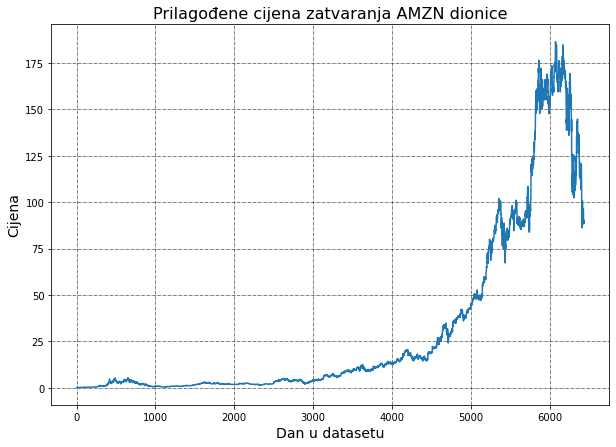

In [ ]:
# Gledamo stupac Adjusted close price jer je prilagođeniji od stupca Close
amazon['Adjusted Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
ticker = 'AMZN'
plt.title("Prilagođene cijena zatvaranja %s dionice" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cijena', fontsize=14)
plt.xlabel('Dan u datasetu', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()


Osim učitavanja podataka o dionicama iz vanjskog dokumenta poput csv-a, moguće je i te podatke učitati na druge načine



## **1.3 Web scraping podataka o željenim dionicama**

U prijašnjim smo primjerima učitavali već uređene podatke unesene u neku csv datoteku. Podatke o dionicama s kojim želimo raditi možemo pronaći i učitati na drugačije načine.

Jedan od tih načina je web scraping. Opis procedure i dobivenih rezultata dani su u nastavku.



Za prikupljanje podataka koristit ćemo se **requests** modulom

Definicija i uporaba **requests** modula:

Modul requests omogućuje slanje HTTP zahtjeva pomoću Pythona.

HTTP zahtjev vraća Response Object sa svim podacima odgovora (sadržaj, kodiranje, status itd.).

In [ ]:
import requests
import pandas as pd
import datetime

years = 5

dt= datetime.datetime.now()
past_date = datetime.datetime(year=dt.year-years, month=dt.month, day=dt.day)

url = 'https://query2.finance.yahoo.com/v8/finance/chart/XOM'
headers= {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36'}
payload = {
'formatted': 'true',
'crumb': 'J2oUJNHQwXU',
'lang': 'en-GB',
'region': 'GB',
'includeAdjustedClose': 'true',
'interval': '1d',
'period1': '%s' %int(past_date.timestamp()),
'period2': '%s' %int(dt.timestamp()),
'events': 'div|split',
'useYfid': 'true',
'corsDomain': 'uk.finance.yahoo.com'}



jsonData = requests.get(url, headers=headers, params=payload).json()
result = jsonData['chart']['result'][0]

indicators = result['indicators']
rows = {'timestamp':result['timestamp']}
rows.update(indicators['adjclose'][0])
rows.update(indicators['quote'][0])

exon = pd.DataFrame(rows)
exon['timestamp'] = pd.to_datetime(exon['timestamp'], unit='s')

In [ ]:
# Izlistavamo tipove podataka u stupcima novostvorenog dataframe-a
exon.dtypes

timestamp    datetime64[ns]
adjclose            float64
low                 float64
high                float64
open                float64
volume                int64
close               float64
dtype: object

In [ ]:
# Ispisujemo prvih pet vrijednsoti u stupcima dataframe-dionice Exon-a
print(exon)

               timestamp    adjclose         low        high        open  \
0    2018-01-22 14:30:00   67.854912   87.050003   88.290001   87.169998   
1    2018-01-23 14:30:00   67.893379   87.739998   88.459999   88.250000   
2    2018-01-24 14:30:00   68.070206   88.010002   88.919998   88.489998   
3    2018-01-25 14:30:00   67.947189   88.199997   88.870003   88.550003   
4    2018-01-26 14:30:00   68.431595   88.470001   89.000000   88.639999   
...                  ...         ...         ...         ...         ...   
1254 2023-01-13 14:30:00  113.150002  112.160004  113.489998  113.110001   
1255 2023-01-17 14:30:00  112.930000  112.669998  114.080002  113.410004   
1256 2023-01-18 14:30:00  110.610001  110.400002  114.120003  113.260002   
1257 2023-01-19 14:30:00  111.320000  109.580002  112.129997  110.070000   
1258 2023-01-20 14:30:00  113.349998  110.610001  113.440002  111.360001   

        volume       close  
0     10270400   88.250000  
1     10281800   88.300003  


Sa ovako dobivenim podacima putem web scrappinga možemo napraviti istu vizualizaciju kao i sa onima dobivenim učitanjem externog csv dokumenta ili putem instalirane biblioteke yfinance

In [ ]:
import plotly.express as px

def plot_stock_data(data,title):  
    plot = px.line(data, 
                        x="timestamp", 
                        y=["adjclose"], 
                        hover_name="timestamp",
                        line_shape="linear",
                        title=title) 
    return plot

In [ ]:
plot_stock_data(exon,'Exon')

## **1.4 Korištenjem vanjskih paketa** 


Jedan od korištenijih paketa je [***yfinance***](https://pypi.org/project/yfinance/) paket. On predstavlja automatizirani i olakšani web scraper prilagođen korištenju u Pythonu.

In [ ]:
# Da bi ga mogli koristiti prvo ga trebamo instalirati
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
# Za učitavanje podataka sa stranice Yahoo! Finance
from  pandas_datareader.data import DataReader
import yfinance as yf

# Za dodavanje datuma
from datetime import datetime


In [ ]:
# Za ovu analizu koristit ćemo se sljedećim dionicama
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NFLX']

# Namještamo datum do kojeg vadimo podatke
end = datetime.now()
#start = datetime(2000, 1, 1)
start = datetime(2018, 1, 1)

# Radimo for petlju za dohvaćanje podataka i njihovo spremanje u dataframe

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Nakon što smo skinuli podatke i učitali ih u dataframe možemo raditi analizu nad njima.

In [ ]:
# Sažeta statistika za dionicu Apple-a
AAPL.describe()

Open         High          Low        Close    Adj Close  \
count  1272.000000  1272.000000  1272.000000  1272.000000  1272.000000   
mean     98.370358    99.567897    97.218101    98.436995    97.172776   
std      46.189048    46.782709    45.576221    46.198708    46.571085   
min      35.994999    36.430000    35.500000    35.547501    34.309582   
25%      51.024376    51.499999    50.643125    51.095626    49.615654   
50%      94.183750    95.302502    93.596252    94.924999    93.468925   
75%     142.579994   144.310001   140.672497   142.649994   141.929367   
max     182.630005   182.940002   179.119995   182.009995   180.959747   

             Volume  
count  1.272000e+03  
mean   1.164523e+08  
std    5.494392e+07  
min    3.519590e+07  
25%    7.964562e+07  
50%    1.017764e+08  
75%    1.363587e+08  
max    4.265100e+08

In [ ]:
# Općenite informacije za dionicu Apple-a
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1272 entries, 2018-01-02 00:00:00-05:00 to 2023-01-20 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1272 non-null   float64
 1   High       1272 non-null   float64
 2   Low        1272 non-null   float64
 3   Close      1272 non-null   float64
 4   Adj Close  1272 non-null   float64
 5   Volume     1272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 101.9 KB


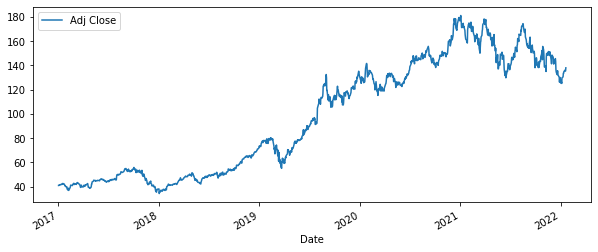

In [ ]:
# Povijesni pregled prilagođene cijene Apple dionice na kraju dana
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

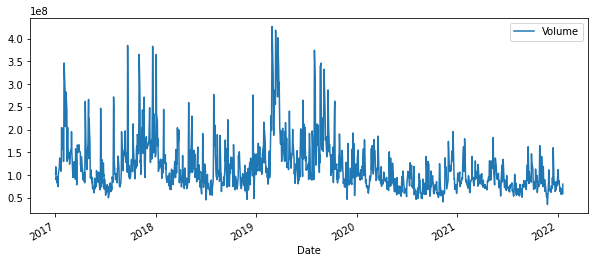

In [ ]:
# Povijesni pregled volumena trgovanja Apple dionica tijekom dana
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Računamo postotak dnevne promjene u cijeni dionice Apple-a

In [ ]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

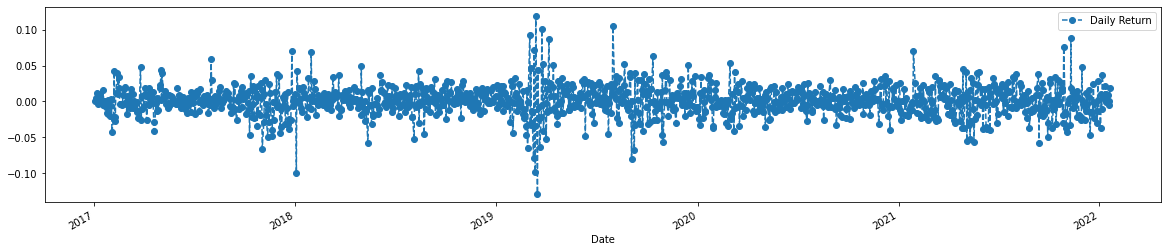

In [ ]:
# I potom ga vizualiziramo
AAPL['Daily Return'].plot(figsize=(20,4),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



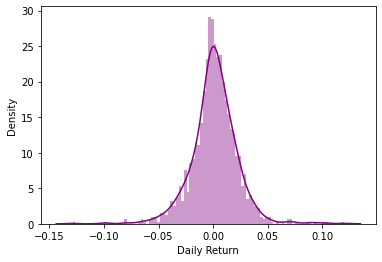

In [ ]:
# Histogram za vizualizaciju prosječnog dnevne promjene
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Da bi smo analizirali grupu dionica tj. njihove karakteristike i sličnosti spojit ćemo prilagođene cijene dionica nekoliko kompanija u jedan dataframe

In [ ]:
# Dohvaćanje i spajanje u jedan datfarame
end2 = datetime.now()
start1 = datetime(2018, 1, 1)

closing_df = yf.download(['AAPL','GOOG','MSFT','AMZN', 'NFLX'],start1,end2)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [ ]:
# Pregledavamo dobiveni dataframe
closing_df.head()

AAPL       AMZN       GOOG       MSFT  \
Date                                                                    
2018-01-02 00:00:00-05:00  40.950493  59.450500  53.250000  80.940399   
2018-01-03 00:00:00-05:00  40.943367  60.209999  54.124001  81.317078   
2018-01-04 00:00:00-05:00  41.133549  60.479500  54.320000  82.032776   
2018-01-05 00:00:00-05:00  41.601856  61.457001  55.111500  83.049835   
2018-01-08 00:00:00-05:00  41.447342  62.343498  55.347000  83.134590   

                                 NFLX  
Date                                   
2018-01-02 00:00:00-05:00  201.070007  
2018-01-03 00:00:00-05:00  205.050003  
2018-01-04 00:00:00-05:00  205.630005  
2018-01-05 00:00:00-05:00  209.990005  
2018-01-08 00:00:00-05:00  212.050003

In [ ]:
# Računamo postotak dnevne promjene i spremamo ga u novi dataframe
tech_rets = closing_df.pct_change()

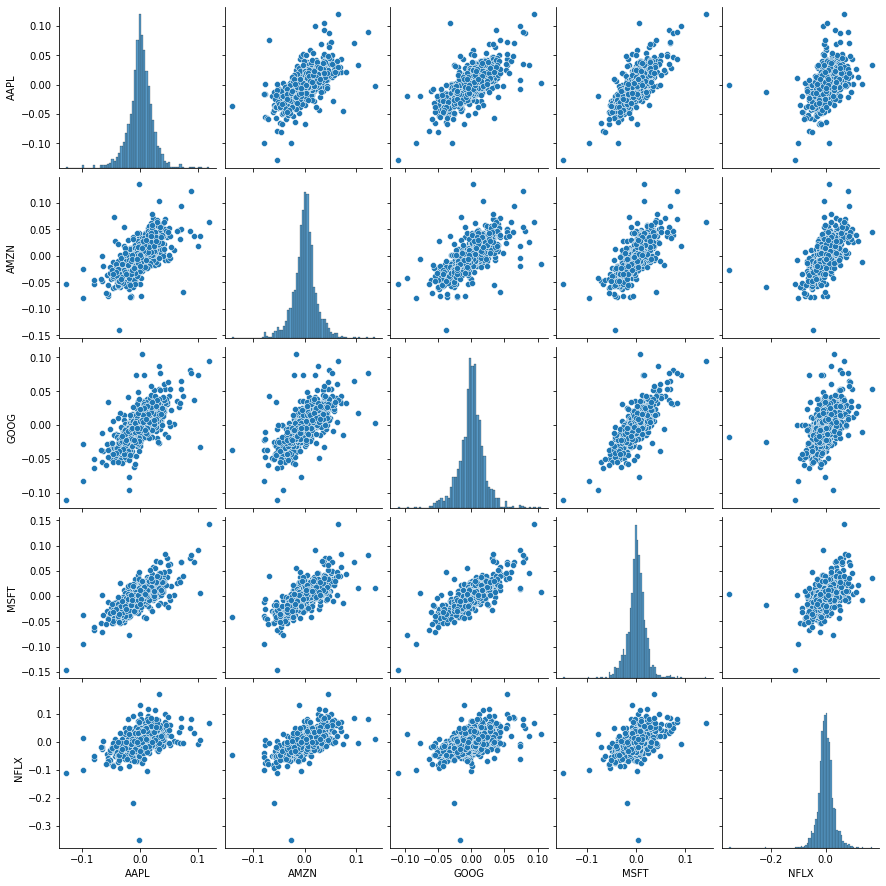

In [ ]:
# Gledamo korelacije između svih dionica u našoj grupi
sns.pairplot(tech_rets.dropna())

In [ ]:
tech_rets.isna().sum()

AAPL    1
AMZN    1
GOOG    1
MSFT    1
NFLX    1
dtype: int64

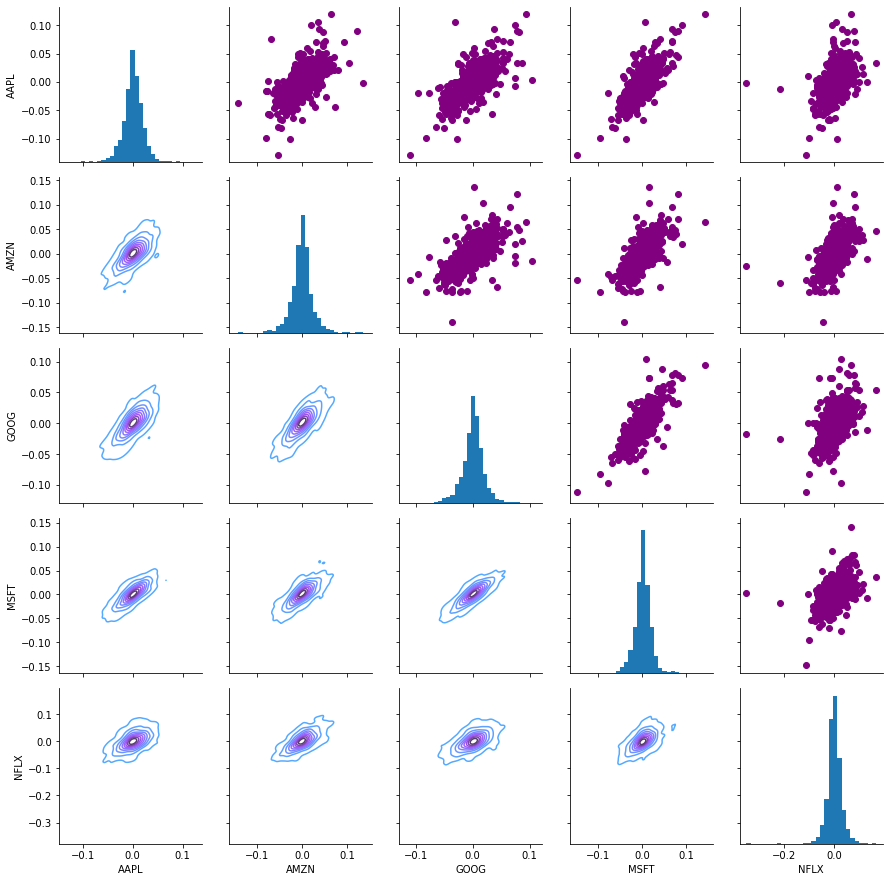

In [ ]:
# Pomiješani plot za vizualizaciju korelacija između dionica tehnoloških kompanija
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

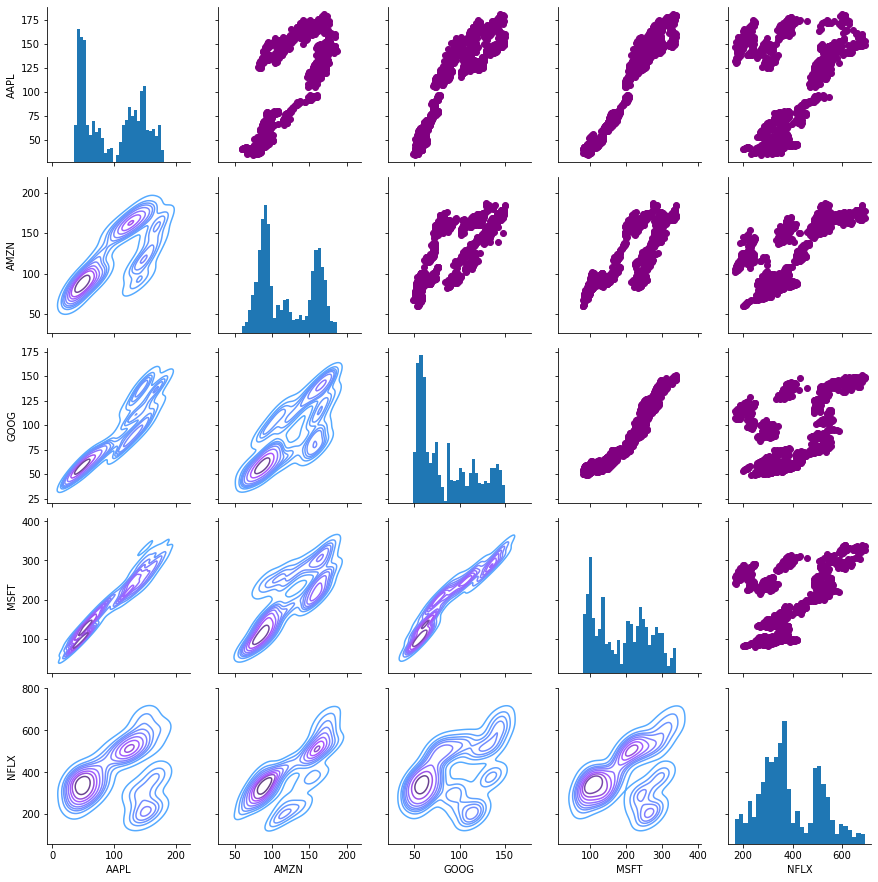

In [ ]:
# Analiza korelacija miješanim plotovima za zatvarujuću (closing price) cijenu dionica tehnoloških kompanija
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

Za dodatne mogućnosti vizualizacije kombiniramo različite dionice u jedan veliki dataframe

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN, NFLX]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NETFLIX']

for company, com_name in zip(company_list, company_name):
    company['company_name'] = com_name
    
df = pd.concat(company_list, axis = 0)
df

Open        High         Low       Close  \
Date                                                                        
2018-01-02 00:00:00-05:00   42.540001   43.075001   42.314999   43.064999   
2018-01-03 00:00:00-05:00   43.132500   43.637501   42.990002   43.057499   
2018-01-04 00:00:00-05:00   43.134998   43.367500   43.020000   43.257500   
2018-01-05 00:00:00-05:00   43.360001   43.842499   43.262501   43.750000   
2018-01-08 00:00:00-05:00   43.587502   43.902500   43.482498   43.587502   
...                               ...         ...         ...         ...   
2023-01-13 00:00:00-05:00  329.970001  336.649994  328.890015  332.820007   
2023-01-17 00:00:00-05:00  331.079987  332.500000  323.600006  326.220001   
2023-01-18 00:00:00-05:00  326.750000  330.079987  321.250000  326.329987   
2023-01-19 00:00:00-05:00  322.570007  324.890015  313.390015  315.779999   
2023-01-20 00:00:00-05:00  336.790009  344.000000  332.630005  342.500000   

                            Adj Close     Volume  Daily Return company_name  
Date                                                                         
2018-01-02 00:00:00-05:00   40.950500  102223600           NaN        APPLE  
2018-01-03 00:00:00-05:00   40.943359  118071600     -0.000174        APPLE  
2018-01-04 00:00:00-05:00   41.133537   89738400      0.004645        APPLE  
2018-01-05 00:00:00-05:00   41.601864   94640000      0.011386        APPLE  
2018-01-08 00:00:00-05:00   41.447338   82271200     -0.003714        APPLE  
...                               ...        ...           ...          ...  
2023-01-13 00:00:00-05:00  332.820007    8277200           NaN      NETFLIX  
2023-01-17 00:00:00-05:00  326.220001    9247000           NaN      NETFLIX  
2023-01-18 00:00:00-05:00  326.329987    7814100           NaN      NETFLIX  
2023-01-19 00:00:00-05:00  315.779999   18008200           NaN      NETFLIX  
2023-01-20 00:00:00-05:00  342.500000   28385600           NaN      NETFLIX  

[6360 rows x 8 columns]

### Povijesni pogled na cijenu na zatvaranju

In [ ]:
import plotly.express as px

fig = px.area(df, facet_col = 'company_name', x = df.index, y = 'Close', facet_col_wrap = 3, color = 'company_name', template = 'plotly_dark')
fig.show()

### Obujam prodaje po dionici

In [ ]:
fig = px.area(df, facet_col = 'company_name', x = df.index, y = 'Volume', facet_col_wrap = 5, color = 'company_name', template = 'plotly_dark')
fig.show()

###Dnevni povrat

Cijene na zatvaranju pokazuju trendove, ali možemo kopati dublje. Pogledajmo dnevni prinos - postotak promjene cijene dionice od jednog dana do sljedećeg.

In [ ]:
df['Daily Return'] = df['Adj Close'].pct_change()

In [ ]:
fig = px.line(df, facet_col = 'company_name', x = df.index, y = 'Daily Return', facet_col_wrap = 3, color = 'company_name', template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.histogram(df, x = 'company_name', y = 'Daily Return', color = 'company_name', template = 'plotly_dark')
fig.show()

###Korelacije između dionica

In [ ]:
# Dohvaćanje i spajanje u jedan datfarame
end2 = datetime.now()
start1 = datetime(2018, 1, 1)

#closing_df = yf.download(['AAPL','GOOG','MSFT','AMZN', 'NFLX'],start1,end2)['Adj Close']

In [ ]:
closing_df = yf.download(tech_list,start1,end2)['Adj Close']
closing_df.head()

[*********************100%***********************]  5 of 5 completed


AAPL       AMZN       GOOG       MSFT  \
Date                                                                    
2018-01-02 00:00:00-05:00  40.950489  59.450500  53.250000  80.940384   
2018-01-03 00:00:00-05:00  40.943363  60.209999  54.124001  81.317085   
2018-01-04 00:00:00-05:00  41.133541  60.479500  54.320000  82.032768   
2018-01-05 00:00:00-05:00  41.601864  61.457001  55.111500  83.049843   
2018-01-08 00:00:00-05:00  41.447338  62.343498  55.347000  83.134583   

                                 NFLX  
Date                                   
2018-01-02 00:00:00-05:00  201.070007  
2018-01-03 00:00:00-05:00  205.050003  
2018-01-04 00:00:00-05:00  205.630005  
2018-01-05 00:00:00-05:00  209.990005  
2018-01-08 00:00:00-05:00  212.050003

In [ ]:
daily = closing_df.pct_change()
daily.head()

AAPL      AMZN      GOOG      MSFT      NFLX
Date                                                                       
2018-01-02 00:00:00-05:00       NaN       NaN       NaN       NaN       NaN
2018-01-03 00:00:00-05:00 -0.000174  0.012775  0.016413  0.004654  0.019794
2018-01-04 00:00:00-05:00  0.004645  0.004476  0.003621  0.008801  0.002829
2018-01-05 00:00:00-05:00  0.011385  0.016163  0.014571  0.012398  0.021203
2018-01-08 00:00:00-05:00 -0.003714  0.014425  0.004273  0.001020  0.009810

U sljedećoj vizualizaciji vidimo savršenu korelaciju jer **Netflix** korelira **sam sa sobom**.

Ovaj primjer je uzet za referencu tj da se vidi što bi bila savršena korelacija.

In [ ]:
fig = px.scatter(daily, x = 'NFLX', y = 'NFLX', marginal_x = 'histogram', marginal_y = 'histogram', template = 'plotly_dark', trendline = 'ols')
fig.show()

U sljedećem primjeru vidimo korelaciju kompanije **Netflix** i **Google**

In [ ]:
fig = px.scatter(daily, x = 'NFLX', y = 'GOOG', marginal_x = 'histogram', marginal_y = 'histogram', template = 'plotly_dark', trendline = 'ols')
fig.show()

U sljedećem primjeru vidimo korelaciju kompanije **Apple** i **Microsoft**


In [ ]:
fig = px.scatter(daily, x = 'AAPL', y = 'MSFT', marginal_x = 'histogram', marginal_y = 'histogram', template = 'plotly_dark', trendline = 'ols')
fig.show()

I konačno, u sljedećoj vizualizaciji vidimo tablicu **svih kompanija** i njihovih **međusobnih korelacija**.

In [ ]:
fig = px.scatter_matrix(daily, template = 'plotly_dark')
fig.show()

Ono što smo iz vizualizacija mogli uočiti moramo pokazati i brojčano.

U sljedećoj tablici imamo heatmapu tj. precizno brojčano određene korelacije između kompanija.

Pošto se odabrane kompanije nalaze u tech sektoru njihova korelacija je uglavnom pozitivna i ne pada ispod 0.48. Tehnološke kompanije uglavnom se međusobno dobro prate na tržištu.

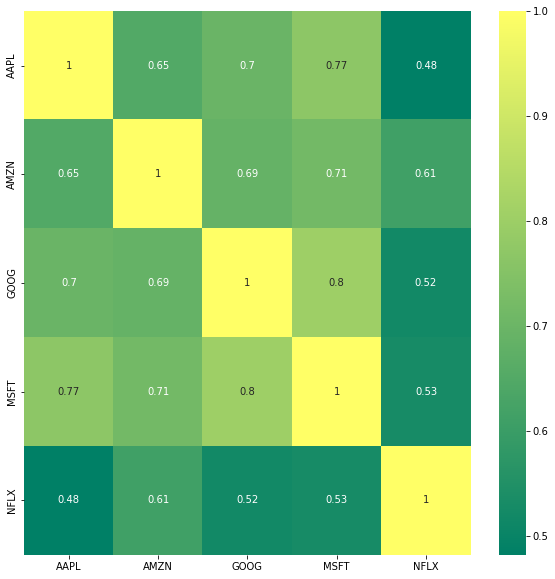

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(daily.corr(), annot = True, cmap = 'summer')

## Rizik i povrat ulaganja

Volatilnost tj. nekonzistentnost kretanja cijena određenih dionica donosi rizik od njihovog posjedovanja bez obzira na dobit tj. povrat uloženog kapitala kojeg ostvare.

Omjer rizika i dobiti najbolje je uočiti vizualizacijom.

In [ ]:
risk = daily.dropna()

In [ ]:
area = np.pi * 20

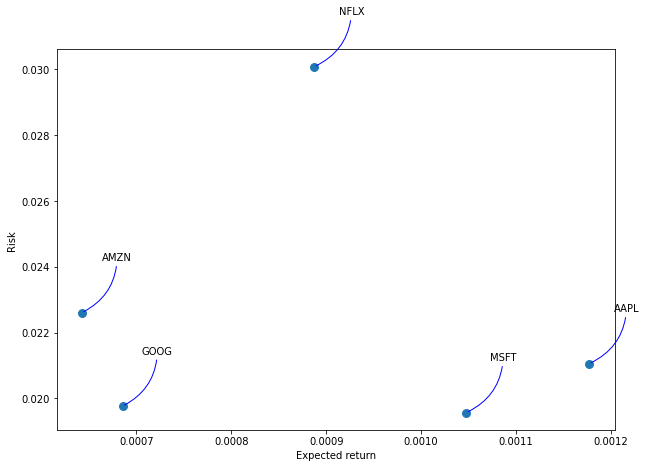

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(risk.mean(), risk.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(risk.columns, risk.mean(), risk.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Netflix ima srednji povrat, ali visok rizik, dok Apple ima visok povrat za umjeren rizik, tako da bi se isplatilo ulagati u Apple ako imate umjeren profil.

##**2. Predviđanje konačne dnevne cijene dionice kompanije Apple**

In [ ]:
# Dohvaćanje podataka dionica Apple-a
end2 = datetime.now()
start1 = datetime(2018, 1, 1)

apple_df = yf.download('AAPL',start1,end2)

[*********************100%***********************]  1 of 1 completed


U grafovima koji analiziraju dionice obično se koristi Grafikon svijećnjaka.

U sljedećoj vizualizaciji prikazane su dnevne vrijednosti dionice Apple-a pomoću grafikona svijećnjaka.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=apple_df.index,
                open=apple_df['Open'],
                high=apple_df['High'],
                low=apple_df['Low'],
                close=apple_df['Close'])])

fig.show()

In [ ]:
data = apple_df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1209

Transformiranje značajki skaliranjem svake značajke na zadani raspon.

Ovaj procjenitelj skalira i prevodi svaku značajku pojedinačno tako da je u zadanom rasponu na skupu za obuku, npr. između nule i jedan.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.68046435],
       [0.680874  ],
       [0.69862592]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.05132712, 0.05127591, 0.05264146, 0.05600409, 0.05489461,
       0.05486046, 0.05479217, 0.05648203, 0.05957155, 0.05803534,
       0.06300248, 0.06327557, 0.06191006, 0.05941794, 0.0594862 ,
       0.0546727 , 0.04936417, 0.05004693, 0.04398738, 0.04229752,
       0.04308269, 0.04368012, 0.03125373, 0.02440898, 0.03557224,
       0.02961507, 0.02212169, 0.02427243, 0.03502604, 0.0378083 ,
       0.04298027, 0.05257319, 0.05161729, 0.0506273 , 0.04929591,
       0.05173679, 0.05685756, 0.06278058, 0.06179056, 0.06132968,
       0.05600409, 0.05806948, 0.0591107 , 0.05885465, 0.0560553 ,
       0.05931553, 0.06450456, 0.06747461, 0.0644875 , 0.06187591,
       0.06223435, 0.06115901, 0.05651618, 0.05641377, 0.04963728,
       0.04550654, 0.03883247, 0.05219767, 0.04463599, 0.04146112])]
[0.04368011846769615]

[array([0.05132712, 0.05127591, 0.05264146, 0.05600409, 0.05489461,
       0.05486046, 0.05479217, 0.05648203, 0.05957155, 0.05803534,
       0.06300248, 0.06327557, 0.06

Sekvencijalni model prikladan je za običan skup slojeva gdje svaki sloj ima točno jedan ulazni tenzor i jedan izlazni tenzor.



#**2.1 O LSTM-U**

Dugo kratkoročno pamćenje (Long short-term memory) je umjetna neuronska mreža koja se koristi u poljima umjetne inteligencije i dubokog učenja. Za razliku od standardnih feedforward neuronskih mreža, LSTM ima povratne veze. Takva rekurentna neuronska mreža (RNN) može obraditi ne samo pojedinačne podatkovne točke (kao što su slike), već i cijele nizove podataka (npr. time series). Ova karakteristika čini LSTM mreže idealnim za obradu i predviđanje podataka.

Naziv LSTM odnosi se na analogiju da standardni RNN ima i "dugoročnu memoriju" i "kratkoročnu memoriju". Težina veze i predrasude u mreži mijenjaju se jednom po epizodi treninga, analogno tome kako fiziološke promjene u sinaptičkim snagama pohranjuju dugoročna sjećanja; obrasci aktivacije u mreži mijenjaju se jednom po vremenskom koraku, analogno tome kako se iz trenutka u trenutak mijenjaju obrasci električnog paljenja u mozgu koji pohranjuju kratkoročna sjećanja. LSTM arhitektura ima za cilj osigurati kratkoročnu memoriju za RNN koja može trajati tisuće vremenskih koraka, dakle "dugo kratkoročno pamćenje".

Uobičajena LSTM jedinica sastoji se od **ćelije**, **ulaznih vrata**, **izlaznih vrata** i **zaboravljenih vrata**. Stanica pamti vrijednosti u proizvoljnim vremenskim intervalima, a tri vrata reguliraju protok informacija u i iz ćelije. Vrata zaborava odlučuju koje će informacije odbaciti iz prethodnog stanja dodjeljivanjem prethodnom stanju, u usporedbi s trenutnim unosom, vrijednosti između 0 i 1. (Zaokružena) vrijednost 1 znači zadržati informacije, a vrijednost 0 znači odbaci ga. Ulazna vrata odlučuju koje dijelove novih informacija pohraniti u trenutnom stanju, koristeći isti sustav kao i zaboravljena vrata. Izlazna vrata kontroliraju koje dijelove informacija u trenutnom stanju treba ispisati dodjeljivanjem vrijednosti od 0 do 1 informacijama, uzimajući u obzir prethodna i trenutna stanja. Selektivno ispisivanje relevantnih informacija iz trenutnog stanja omogućuje LSTM mreži održavanje korisnih, dugoročnih ovisnosti za izradu predviđanja, kako u sadašnjim tako i u budućim vremenskim koracima.

Treniranje modela na CPU

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Stvaramo LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Kompajliramo model
model.compile(optimizer='adam', loss='mean_squared_error')

# Treniramo model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1149/1149 [==============================] - 16s 8ms/step - loss: 0.0025


Izmjereno-> 46 sekundi

Treniranje modela na GPU

In [ ]:
from tensorflow.python.client import device_lib
if "GPU" in str(device_lib.list_local_devices()):
  print('GPU found')
  print([ line for line in str(device_lib.list_local_devices()).splitlines() if "physical_device" in line ])
else:
  print('GPU not found')

GPU found
['physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"']


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import timeit
def train_on_gpu():  
  # Stvaramo LSTM model
  model = Sequential()
  model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(64, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  # Kompajliramo model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Treniramo model
  model.fit(x_train, y_train, batch_size=1, epochs=1)
      
gpu_time = timeit.timeit('train_on_gpu()', 
                         setup="from __main__ import train_on_gpu", 
                         number=1)

print('Time to fit model on GPU: {} sec'.format(int(gpu_time)))

1149/1149 [==============================] - 12s 8ms/step - loss: 0.0032
Time to fit model on GPU: 12 sec


Izmjereno-> Time to fit model on GPU: 12 sec


In [ ]:
# Kreiramo set podataka za testiranje 
# Kreiramo novi niz u kojemu će biti zadnjih 60 skaliranih vrijednosti
test_data = scaled_data[training_data_len - 60: , :]
# Kreiramo setove podataka  x_test i y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Konvertiramo podatke u numpy niz
x_test = np.array(x_test)

# Reshape-amo podatke u potreban oblik 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Dodijeljujemo predviđene cijene varijabli predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Računamo RMSE (root mean squared error)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 8ms/step


6.559294287580503

In [ ]:
# Spremamo predviđene vrijednosti u stupac dataframe-a za kasniju usporedbu
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-60-dad4f517a035>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vizualizacija predviđenih i stvarnih vrijednosti dionica

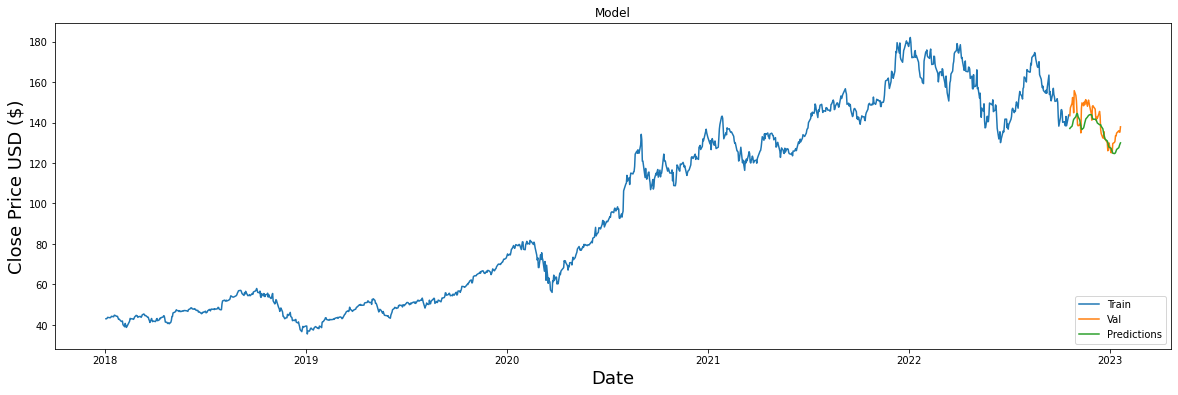

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Uočavamo da je model poprilično uspješno predvidio buduće kretanje cijene dionice

Ispis dataframe-a sa vrijednostima stvarnih cijena i predviđenih cijena po datumima za konkrentnu brojčanu usporedbu

In [ ]:
valid

Close  Predictions
Date                                              
2022-10-20 00:00:00-04:00  143.389999   137.059891
2022-10-21 00:00:00-04:00  147.270004   137.447784
2022-10-24 00:00:00-04:00  149.449997   138.186020
2022-10-25 00:00:00-04:00  152.339996   139.218414
2022-10-26 00:00:00-04:00  149.350006   140.573669
...                               ...          ...
2023-01-13 00:00:00-05:00  134.759995   126.691811
2023-01-17 00:00:00-05:00  135.940002   127.587105
2023-01-18 00:00:00-05:00  135.210007   128.536469
2023-01-19 00:00:00-05:00  135.270004   129.317825
2023-01-20 00:00:00-05:00  137.869995   129.929993

[63 rows x 2 columns]

Ono što smo vidjeli vizualno potvrđujemo brojkama i vidimo malo odstupanje predviđene i stvarne cijene na određeni datum

# **3. Analiza i predviđanje volumena trgovanja pomoću Prophet-a**

Podaci o dionicama kojima raspolažemo predstavljaju vremenenski niz. 
Vremenski nizovi mogu pokazivati različite obrasce te ih je često korisno razdvojiti u nekoliko različitih komponenti:
- **trend**: opisuje dugoročni rast ili pad vrijednosti promatranih podataka.
  - trend ne mora biti linearan
- **sezonalnost**: opisuje obrasce u podacima na koje utječu sezonski čibenici poput doba godine ili dana u tjednu. 
  - sezonalnost je uvijek fiksne i poznate učestalosti
- **cikličnost**: događa se kada u podacima dolazi do "uspona" i "padova" koji nisu fiksne frekvencije.
  - ciklusi se često događaju zbog ekonomskih uvjeta, i često se vežu uz "poslovni ciklus"
  - trajanje ovih fluktuacija je obično najmanje 2 godine


## O Prophet-u

[***FB Prophet***](https://facebook.github.io/prophet/) je paket za predviđanje u R-u i Pythonu koji je razvio Facebookov tim za istraživanje podataka.

Ideja je olakšati predviđanje vremenskih nizova velikom broju korisnika, omogućujući pri tom korištenje različitih tipova vremenskih nizova.

Koristi se **generalizirani aditivni model** vremenskog niza koji se sastoji od tri osnovne komponente: *trenda*, *sezonalnost* i *blagdana*: 
<br>

$$y(t) = g(t) + s(t) + h(t) + \varepsilon_t$$

pri čemu 
- $g(t)$ označava trend (promjene vrijednosti vremenskog niza koje nisu periodične)
-$s(t)$ označava periodične promjene tj. sezonalnost
- $h(t)$ opisuje utjecaj blagdana na vrijednosti vremenskog niza koji se pojavljuju u nepravilnim razmacima i mogu "trajati" jedan dan ili više dana
- $\varepsilon_t$: *pogreška*, preostale vrijednosti koje model ne obuhvaća.



## **3.1 Ideja i cilj korištenja Prophet-a**

Predviđanje (prognoziranje, *forecasting*) uobičajeni je zadatak podatkovne znanosti koji pomaže različitim poslovnim organizacijama pri planiranju kapaciteta, donošenju različitih odluka, postavljanju ciljeva i otkrivanju anomalija.

> ***Forecasting*** *se temelji na predviđanju budućnosti što je moguće točnije koristeći dostupne informacije poput povijesnih podataka i spoznajama o potencijalnim budućim događanjima koja bi mogla utjecati na predviđanje.*

Prophet-om analiziramo volumen trgovanja dionica i nastojimo uočiti ima li nekakvih pravilnosti i uzoraka u nekom razdoblju te utječe li doba godine na ukupni volumen trgovanja neke dionice.

Prvo instaliramo i uvozimo potrebni paket

In [ ]:
# !pip install prophet
import prophet
print("Prophet version:", prophet.__version__)

Prophet version: 1.1.1


Učitavamo dionicu Amazona kojoj ćemo predviđati budući volumen trgovanja

In [ ]:
amazon = pd.read_csv('AMZN.csv')

Provjeravamo izgled dataframe-a i koje stupce sadrži

In [ ]:
amazon.head()

Date       Low      Open      Volume      High     Close  \
0  15-05-1997  0.096354  0.121875  1443120000  0.125000  0.097917   
1  16-05-1997  0.085417  0.098438   294000000  0.098958  0.086458   
2  19-05-1997  0.081250  0.088021   122136000  0.088542  0.085417   
3  20-05-1997  0.081771  0.086458   109344000  0.087500  0.081771   
4  21-05-1997  0.068750  0.081771   377064000  0.082292  0.071354   

   Adjusted Close  
0        0.097917  
1        0.086458  
2        0.085417  
3        0.081771  
4        0.071354

Provjeravamo tip podataka koji se nalazi u stupcima

In [ ]:
amazon.dtypes

Date               object
Low               float64
Open              float64
Volume              int64
High              float64
Close             float64
Adjusted Close    float64
dtype: object

Želimo da nam stupac Date bude u formatu datetime kako bi ga mogli učitati u prophet

In [ ]:
amazon['Date'] = pd.to_datetime(amazon['Date'])

In [ ]:
amazon.dtypes

Date              datetime64[ns]
Low                      float64
Open                     float64
Volume                     int64
High                     float64
Close                    float64
Adjusted Close           float64
dtype: object

In [ ]:
amazon.head()

Date       Low      Open      Volume      High     Close  \
0 1997-05-15  0.096354  0.121875  1443120000  0.125000  0.097917   
1 1997-05-16  0.085417  0.098438   294000000  0.098958  0.086458   
2 1997-05-19  0.081250  0.088021   122136000  0.088542  0.085417   
3 1997-05-20  0.081771  0.086458   109344000  0.087500  0.081771   
4 1997-05-21  0.068750  0.081771   377064000  0.082292  0.071354   

   Adjusted Close  
0        0.097917  
1        0.086458  
2        0.085417  
3        0.081771  
4        0.071354

##**3.2 Očekivani format ulaznih podataka**
Prophet model kao ulaz očekuje *dataframe* s dva stupca  `ds` i `y`: 
- `ds` (datastamp): idealno oblika `YYYY-MM-DD` za datum ili `HH:MM:SS` za vrijeme
- `y`: numeričke vrijednosti, mjerenje koje želimo predviđati. U ovom slučaju to je volumen

Izvlačimo 2 potrebna stupca u zasebni dataframe

In [ ]:
amazon_za_prophet=amazon[['Date','Volume']]
amazon_za_prophet.head()

Date      Volume
0 1997-05-15  1443120000
1 1997-05-16   294000000
2 1997-05-19   122136000
3 1997-05-20   109344000
4 1997-05-21   377064000

Mijenjamo imena stupca kako bi ih Prophet mogao učitati

In [ ]:
amazon_za_prophet.columns=['ds', 'y']
amazon_za_prophet.head()

ds           y
0 1997-05-15  1443120000
1 1997-05-16   294000000
2 1997-05-19   122136000
3 1997-05-20   109344000
4 1997-05-21   377064000

Provjeravamo broj redova da znamo s koliko vrijednosti raspolažemo

In [ ]:
amazon_za_prophet.shape

(6438, 2)

In [ ]:
from prophet import Prophet

# "fitt"-amo model
m = Prophet() # stvorimo instancu klase Prophet koja ima fit i predict metode
m.fit(amazon_za_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp57kdu9i8/lyh2zvnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp57kdu9i8/d6ocavqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17153', 'data', 'file=/tmp/tmp57kdu9i8/lyh2zvnw.json', 'init=/tmp/tmp57kdu9i8/d6ocavqn.json', 'output', 'file=/tmp/tmp57kdu9i8/prophet_modell057bs1p/prophet_model-20230122101033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Stvaranje okvira s datumima koje želimo prognozirati.

Sadrži povijest + 365 dana u budućnosti.

In [ ]:
future = m.make_future_dataframe(periods=365) 

In [ ]:
future.shape

(6803, 1)

Želimo predvidjeti za zadnjih 365 dana u future datasetu zato stavljamo -365 u zagrade

In [ ]:
future[-365:]

ds
6438 2022-12-13
6439 2022-12-14
6440 2022-12-15
6441 2022-12-16
6442 2022-12-17
...         ...
6798 2023-12-08
6799 2023-12-09
6800 2023-12-10
6801 2023-12-11
6802 2023-12-12

[365 rows x 1 columns]

Predviđanje:

In [ ]:
forecast = m.predict(future)

Gledamo stupce koji su nam dostupni

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

> Koje sve podatke vraća `predict` metoda?
* predviđena vrijednost - `yhat` 
* donja i gornja granica "intervala nesigurnosti" - `yhat_lower`, `yhat_upper`
* podatke o trendu - `trend_lower`, `trend_upper`, `trend_upper`
* podatke o sezonalnosti - `weekly`, `weekly_lower`, `weekly_upper`, `yearly`, `yearly_lower`, `yearly_upper`




In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() 

ds          yhat    yhat_lower    yhat_upper
6798 2023-12-08  6.991611e+07 -7.005997e+07  2.126497e+08
6799 2023-12-09  6.446198e+07 -8.810413e+07  2.050376e+08
6800 2023-12-10  6.107306e+07 -8.106731e+07  2.250319e+08
6801 2023-12-11  5.817055e+07 -9.211437e+07  2.007894e+08
6802 2023-12-12  5.969147e+07 -7.305669e+07  2.050458e+08

## **3.3 Vizualiziramo dobiveni vremenski niz**

Desni dio grafa označava buduće trend vrijednosti te tu nema crnih točkica koje bi označavale točno izmjereni volumen na taj datum.

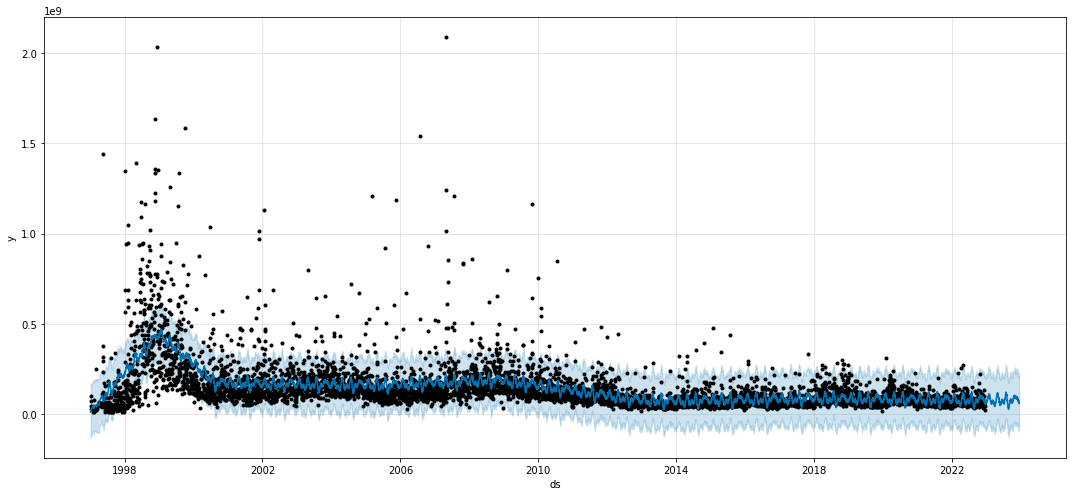

In [ ]:
fig1 = m.plot(forecast, figsize=(15,7))

Vizualiziramo individualne komponente vremenskog niza: trend, godišnja/tjedna sezonalnost

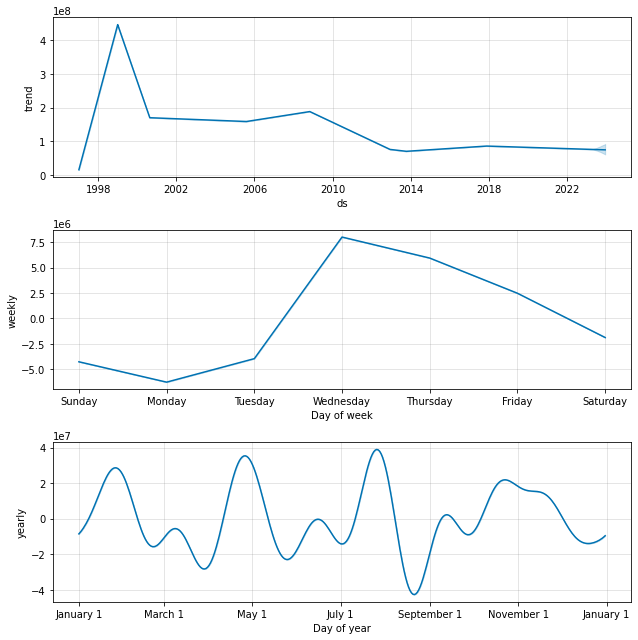

In [ ]:
fig2 = m.plot_components(forecast)

Možemo analizirati specifične godine koje sami odaberemo

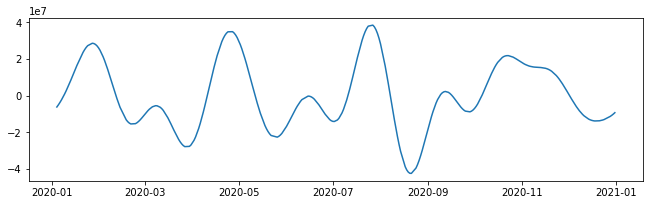

In [ ]:
godina_2020 = forecast[forecast.ds.between("2020-01-01", "2020-12-31")]
plt.figure(figsize=(11, 3))
plt.plot(godina_2020["ds"], godina_2020["yearly"]);

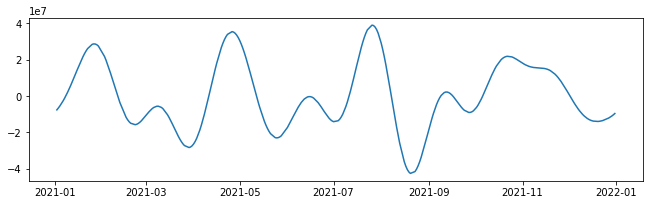

In [ ]:
godina_2021 = forecast[forecast.ds.between("2021-01-01", "2021-12-31")]
plt.figure(figsize=(11, 3))
plt.plot(godina_2021["ds"], godina_2021["yearly"]);

Gledajući prethodne grafove možemo uočiti određenu pravilnost u promijeni volumena kroz godinu.

U sljedećim primjerima vidimo konzistentan pad u količini volumena trgovanja u tjednima prije zimskih blagdana. Volumen je uobičajen prije i nakon ali pada u tjednu prije Božića iako je tada market otvoren i može se trgovati

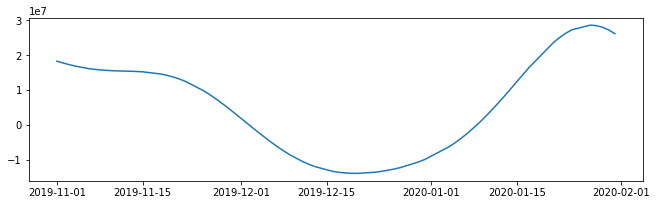

In [ ]:
zima_2019 = forecast[forecast.ds.between("2019-11-01", "2020-01-31")]
plt.figure(figsize=(11, 3))
plt.plot(zima_2019["ds"], zima_2019["yearly"]);

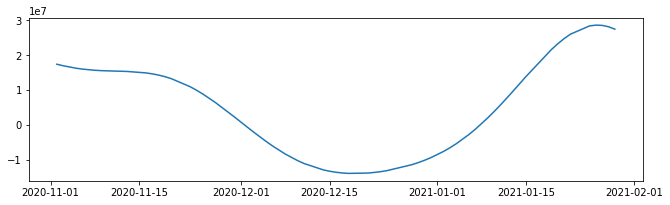

In [ ]:
zima_2020 = forecast[forecast.ds.between("2020-11-01", "2021-01-31")]
plt.figure(figsize=(11, 3))
plt.plot(zima_2020["ds"], zima_2020["yearly"]);

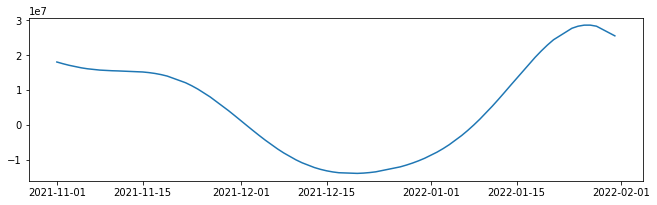

In [ ]:
zima_2021 = forecast[forecast.ds.between("2021-11-01", "2022-01-31")]
plt.figure(figsize=(11, 3))
plt.plot(zima_2021["ds"], zima_2021["yearly"]);

U sljedećem primjeru možemo vidjeti interaktivan graf na kojem sami odaberemo vremenski period u kojem želimo promatrati volumen trgovanja:

In [ ]:
from prophet.plot import plot_plotly
plot_plotly(m, forecast)

# **4. Analiza dionica kompanije Tesla**

Čitajući financijske portale i forume lako je uočiti bombastične naslove koji govore o manipulaciji cijene dionica davanjem nekih izjava ili pisanjem tih istih izjava na Twitteru. Jedan dobar primjerak toga je Elon Musk i utjecaj njegovih tweetova na promjenu cijene dionice Tesle. Možda neke slučajnosti između tweetova i pada tj. rasta cijene dionice postoji kao što su navedene  u člancima:

 [***The 7 Elon Musk tweets that have sent Tesla shares on a rollercoaster ride***](https://fortune.com/2021/11/09/elon-musk-tweets-tesla-shares-hertz-funding-secured-twitter-sec-shiba-inu/) 


 [***How tweets by Tesla's Elon Musk have moved markets***](https://www.reuters.com/business/finance/how-tweets-by-teslas-elon-musk-have-moved-markets-2021-11-08/) 

Ali to ostaje za dokazati gledajući puno širi spektar Muskovih tweetova kroz godine.

Ideja ovog poglavlja je iskoristiti učitane podatke u kombinaciji s još jednom grupom podataka i pokazati što je moguće iz te kombinacije uočiti. Uz učitane podatke o dionici koji sadrže dnevne promjene cijena koriste se i podaci  [***tweetova Elona Muska.***](https://www.kaggle.com/datasets/kulgen/elon-musks-tweets?datasetId=2931&sortBy=voteCount) 

Stupce u podacima čine sadržaj nekog tweet-a, vrijeme kada je napisan i od koga je retweetan, ako je retweetan.

Za analizu tweetova koristit će se biblioteka [***TextBlob.***](https://textblob.readthedocs.io/en/dev/) Ona nam omogućuje analizu sentimenta tj. nastrojenosti pojedinih tweetova kako bi ih mogli lakše grupirati u skupine ovisno o tome jesu li pozitivni ili negativni. Zatim će se broj i nastrojenost tweetova usporediti s dnevnom promjenom cijene dionice tj. razliku između cijene na zatvaranju i one koja je bila na otvaranju kako bi se procijenilo je li utjecaj tih tweetova bio pozitivan na cijenu dionice i povećao ju ili je bio negativan i smanjio cijenu dionice na kraju dana.

Učitavamo potrebne setove podataka

In [ ]:
musk_tweets_data_file = '/content/drive/MyDrive/PMF/ZnanUPZ-SEM/P/Data/data_elonmusk.csv' 
tesla_stock_data_file = '/content/drive/MyDrive/PMF/ZnanUPZ-SEM/P/Data/stock_market_data/forbes2000/csv/TSLA.csv'

In [ ]:
tweets_df = pd.read_csv(musk_tweets_data_file, encoding='latin1')
tesla_stock_price_df = pd.read_csv(tesla_stock_data_file)

In [ ]:
tweets_df.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from      User  
0  2017-09-29 17:39:19          NaN  elonmusk  
1  2017-09-29 10:44:54       SpaceX  elonmusk  
2  2017-09-29 10:39:57          NaN  elonmusk  
3  2017-09-29 09:56:12          NaN  elonmusk  
4  2017-09-29 09:19:21          NaN  elonmusk

In [ ]:
tesla_stock_price_df.head()

Date       Low      Open     Volume      High     Close  \
0  29-06-2010  1.169333  1.266667  281494500  1.666667  1.592667   
1  30-06-2010  1.553333  1.719333  257806500  2.028000  1.588667   
2  01-07-2010  1.351333  1.666667  123282000  1.728000  1.464000   
3  02-07-2010  1.247333  1.533333   77097000  1.540000  1.280000   
4  06-07-2010  1.055333  1.333333  103003500  1.333333  1.074000   

   Adjusted Close  
0        1.592667  
1        1.588667  
2        1.464000  
3        1.280000  
4        1.074000

## **4.1 Čišćenje podataka**
Učitane setove podataka potrebno je očistiti i oblikovati, za to ćemo definirati nekoliko funkcija kako bi uštedili vrijeme i eventualno mogli ponoviti proces na nekom drugom setu dionica ili tweetova

In [ ]:
# uvozimo regularne izraze
import re

def clean_tweet(tweet):
    """ Funkcija za čišćenje tweetova koja uklanja linkove, posebna slova koristeći regularni izraz. """
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+://\S+)", " ", tweet).split())

In [ ]:
# Vraća polarnost određenog tweeta koristeći TextBlob analizu
from textblob import TextBlob
def analyse_tweet(tweet):
    """ Funkcija za klasifikaciju sentimenta odgovarajućeg tweet-a koristeći textblob's sentiment metodu """
    clean_tweet(tweet)
    # stvori TextBlob objekt koji sadrži tekst zadovoljavajućeg tweet-a 
    tweet_analysis = TextBlob(tweet)
    return tweet_analysis.sentiment.polarity

In [ ]:
# Analizira tweet koristeći TextBlob i kategorizira ga kao 'pozitivnog', 'negativnog' or 'neutralnog'
def get_tweet_sentiment(tweet):
    tweet_polarity = analyse_tweet(tweet)
    # set sentiment
    if tweet_polarity > 0:
        return 'positive'
    elif tweet_polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
# Filtriramo datume
from pandas.tseries.offsets import BDay
def filter_by_daterange(df):
    start_date = pd.to_datetime("2012-1-1").date()
    end_date = pd.to_datetime("2017-12-31").date()
    mask = (df['Time'] > start_date) & (df['Time'] <= end_date)
    df = df.loc[mask]
    #Zanimaju nas samo poslovni dani kad se trguje dionicama
    isBusinessDay = BDay().onOffset
    match_series = pd.to_datetime(df['Time']).map(isBusinessDay)
    df[match_series]
    return df


In [ ]:
# Čistimo set podataka tweet-ova
def clean_tweet_data(tweets):
    # Izbacujemo stupce nevažne za analizu
    tweets = tweets.drop('row ID',1)
    tweets = tweets.drop('User',1)
    # Mijenjamo tip podataka u stupcu 'Time' u datetime i uzimamo samo datum
    tweets['Time'] = pd.to_datetime(tweets['Time']).dt.date
    # U obzir uzimamo samo datume u nekom vremenskom razdoblju
    tweets = filter_by_daterange(tweets)
    # Dodajemo sentiment pojedinog tweeta u dataset
    tweets['Sentiment'] = tweets.apply(lambda row : get_tweet_sentiment(row['Tweet']), axis=1)
    tweets_sentiment = tweets[['Time', 'Sentiment']].copy() 
    # Uzet ćemo maksimalni sentiment nekog tweeta kao sentiment za taj dan
    tweets_sentiment = tweets_sentiment.groupby(tweets_sentiment.Time)\
                        .agg(lambda x: x.value_counts().index[0])
    tweets_sentiment.sort_values(by=['Time'], inplace=True)
    return tweets_sentiment

In [ ]:
# Čistimo set podataka o vrijednosti dionice
def clean_stock_data(stock_data):
    # Brišemo sve nul vrijednosti ukoliko ih ima
    stock_data = stock_data.dropna()
    # Mijenjamo tip podataka u stupcu 'Date' u datetime i uzimamo samo datum
    stock_data['Time'] = pd.to_datetime(stock_data['Date']).dt.date
    stock_data = stock_data.drop('Date',1)
    # U obzir uzimamo samo datume u nekom vremenskom razdoblju
    stock_data = filter_by_daterange(stock_data)    
    # Izračunavamo dnevnu promjenu u cijeni dionica 
    stock_data['daily_percentage_change'] = (stock_data['Close'] - stock_data['Open']) / stock_data['Open'] * 100
    stock_daily_change = stock_data[['Time', 'daily_percentage_change']].copy()
    stock_daily_change.sort_values(by=['Time'], inplace=True)
    return stock_daily_change


In [ ]:
# Spajamo datasetove o tweetovima i vrijednsotima cijene dionice u jedan
def merge_tweets_and_stock_data(tweets_sentiment_data, stock_price_change_data):
    # Spajamo ih na temelju datuma tj vremena
    sentiment_stock_change_data = pd.merge(tweets_sentiment_data, stock_price_change_data, on='Time', how='inner')
    return sentiment_stock_change_data

In [ ]:
# Pretvaranje  stupca 'Sentiment' u kategoričku vrijednost
def make_sentiment_column_categorical(tweet_sentiment_with_price_change):  
    tweet_sentiment_with_price_change['Sentiment'] = tweet_sentiment_with_price_change['Sentiment'].astype('category')
    tweet_sentiment_with_price_change['Sentiment'] = tweet_sentiment_with_price_change['Sentiment'].cat.codes
    return tweet_sentiment_with_price_change

In [ ]:
# Definiranje linearne regresije

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from pandas.tseries.offsets import BDay

def do_linear_regression(X, Y):
    # Dijelimo ukupne podatke u podatke za treniranje i podatke za testiranje
    X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    # Treniramo model
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, Y_train)
    # Računamo r2_score (varijanca) koristeći sklearn linear_model
    r2_score_1 = linear_regression_model.score(X, Y)
    # Predviđamo postotak promjene sa treniranim modelom koristeći podatke za testiranje
    y_predicted = linear_regression_model.predict(x_test)
    # r2_score koristeći sklearn metrike (1 je savršeno predviđanje)
    r2_score_2 = r2_score(y_test, y_predicted)
    # Crtamo reziduale podataka koristeći biblioteku seaborn i metodu residplot
    plt.figure(figsize=(15,4))
    sns.residplot(sentiment, price_change)
    plt.xlabel("Sentiment")
    plt.ylabel("Promjena cijene")
    plt.title("Residual Plot - Sentiment tweetova naspram Postotak promjene cijene dionice Tesle koristeći linearnu regresiju")
    plt.show()
    # Stvarni plot i predviđena promjena cijene dionice iz modela
    plt.figure(figsize=(15,4))
    plt.scatter(X, Y,  color='black')
    plt.plot(y_test, y_predicted, color='blue', linewidth=3)
    plt.xlabel("Sentiment")
    plt.ylabel("Postotak promjene cijene dionice")
    plt.title("Scatter Plot - Sentiment tweetova naspram Postotak promjene cijene dionice Tesle koristeći linearnu regresiju")
    plt.show()
    
    return r2_score_1, r2_score_2

In [ ]:
# Analiza slučajnom šumom
def do_random_forest_analysis(X, Y):
    # Dijelimo ukupne podatke u podatke za treniranje i podatke za testiranje
    X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    #Treniramo model
    random_forest_model = RandomForestRegressor()
    random_forest_model.fit(X_train, Y_train)
    #Računamo r2_score (varijanca) koristeći random_forest_model
    r2_score_1 = random_forest_model.score(X, Y)
    # Predviđamo postotak promjene sa treniranim modelom koristeći podatke za testiranje
    y_predicted = random_forest_model.predict(x_test)
    # r2_score koristeći sklearn metrike (1 je savršeno predviđanje)
    r2_score_2 = r2_score(y_test, y_predicted)
    # Crtamo reziduale podataka koristeći biblioteku seaborn i metodu residplot
    plt.figure(figsize=(15,4))
    sns.residplot(sentiment, price_change)
    plt.xlabel("Sentiment")
    plt.ylabel("Price change")
    plt.title("Residual Plot - Sentiment tweetova naspram Postotak promjene cijene dionice Tesle koristeći metodu slučajne šume")
    plt.show()
    # Stvarni plot i predviđena promjena cijene dionice iz modela
    plt.figure(figsize=(15,4))
    plt.scatter(X, Y,  color='black')
    plt.plot(y_test, y_predicted, color='blue', linewidth=3)
    plt.xlabel("Sentiment")
    plt.ylabel("Postotak promjene cijene dionice")
    plt.title("Scatter Plot - Sentiment tweetova naspram Postotak promjene cijene dionice Tesle koristeći metodu slučajne šume")
    plt.show()
    return r2_score_1, r2_score_2

In [ ]:
# Funkcija za čišćenje tweetova
cleaned_tweets_with_sentiment = clean_tweet_data(tweets_df)
print(" Broj očišćenih tweetova = ", cleaned_tweets_with_sentiment.Sentiment.count())

# Funkcija za čišćenje dionica
tesla_stock_with_daily_change = clean_stock_data(tesla_stock_price_df)
print("\n Broj promijena cijena dionica = ", tesla_stock_with_daily_change.daily_percentage_change.count())

# Spajamo 2 različita dataseta u 1 zajednički
sentiment_stock_change_df = merge_tweets_and_stock_data(cleaned_tweets_with_sentiment, tesla_stock_with_daily_change)

# Dodajemo vrijednosti u stupac sentiment za svaki tweet ovisno o tome kakav je
positive_sentiment_stock_change_data = sentiment_stock_change_df.loc[sentiment_stock_change_df['Sentiment'] == 'positive']
negative_sentiment_stock_change_data = sentiment_stock_change_df.loc[sentiment_stock_change_df['Sentiment'] == 'negative']
neutral_sentiment_stock_change_data = sentiment_stock_change_df.loc[sentiment_stock_change_df['Sentiment'] == 'neutral']

# Printamo dobivene rezultate
print("\n Ukupan broj dana sa vrijednosti sentimenta u tweeovima", sentiment_stock_change_df.Time.count())
print("\n Broj dana sa pozitivnim sentimentom tweeta", positive_sentiment_stock_change_data.Time.count())
print("\n Broj dana sa negativnim sentimentom tweeta", negative_sentiment_stock_change_data.Time.count())
print("\n Broj dana sa neutralnim sentimentom tweeta", neutral_sentiment_stock_change_data.Time.count())

<ipython-input-96-d2ad583b04f4>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

<ipython-input-96-d2ad583b04f4>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.8/dist-packages/pandas/core/base.py:870: FutureWarning:

onOffset is a deprecated, use is_on_offset instead



 Broj očišćenih tweetova =  892

 Broj promijena cijena dionica =  1509

 Ukupan broj dana sa vrijednosti sentimenta u tweeovima 624

 Broj dana sa pozitivnim sentimentom tweeta 332

 Broj dana sa negativnim sentimentom tweeta 56

 Broj dana sa neutralnim sentimentom tweeta 236


<ipython-input-97-b62bd663ff47>:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
# Računanje srednje vrijednosti i standardne devijacije postotka promjene cijene dionice po sentimentu tweetova.
grouped_sentiment_stock_change = sentiment_stock_change_df.groupby(['Sentiment'], as_index=False)
mean_stock_price_change = grouped_sentiment_stock_change.mean()
stddev_stock_price_change = grouped_sentiment_stock_change['daily_percentage_change'].apply(lambda x: x.std())

print("\nSrednja vrijednost postotka promjene cijene dionice po sentimentu")
print(mean_stock_price_change)

print("\nStandardna devijacija postotka promjene cijene dionice po sentimentu")
print(stddev_stock_price_change)


Srednja vrijednost postotka promjene cijene dionice po sentimentu
  Sentiment  daily_percentage_change
0  negative                 0.210397
1   neutral                 0.157123
2  positive                 0.146891

Standardna devijacija postotka promjene cijene dionice po sentimentu
  Sentiment  daily_percentage_change
0  negative                 1.997870
1   neutral                 2.126708
2  positive                 2.577559


## **4.2 Vizualizacija odnosa pomoću Violin plot-a i boxplota**

**Violinski dijagrami** imaju mnogo istih sažetih statistika kao box dijagrami:

Bijela točka u sredini predstavlja medijan

Debela siva traka u sredini predstavlja interkvartilni raspon (Q3-Q1, prostor između 1 i 3 kvartila)

Tanka siva linija predstavlja ostatak distribucije, osim točaka za koje je utvrđeno da su "outliers" metodom koja je funkcija interkvartilnog raspona.

Sa svake strane sive linije nalazi se procjena gustoće jezgre koja prikazuje oblik distribucije podataka. Širi dijelovi zapleta violine predstavljaju veću vjerojatnost da će pripadnici populacije preuzeti danu vrijednost; mršaviji dijelovi predstavljaju manju vjerojatnost.

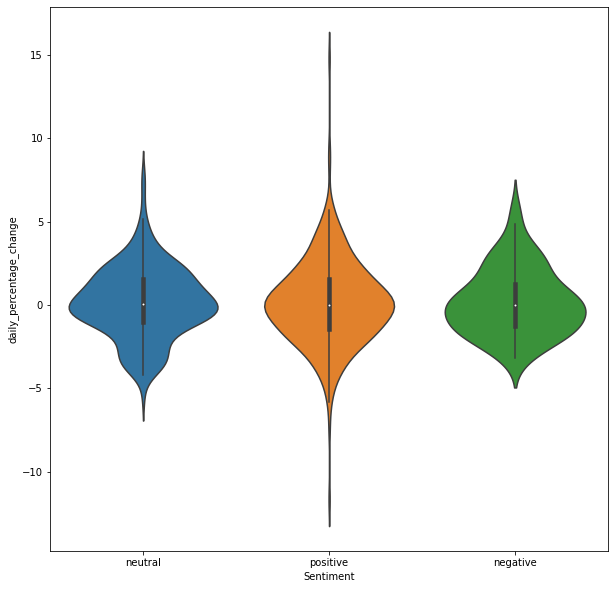

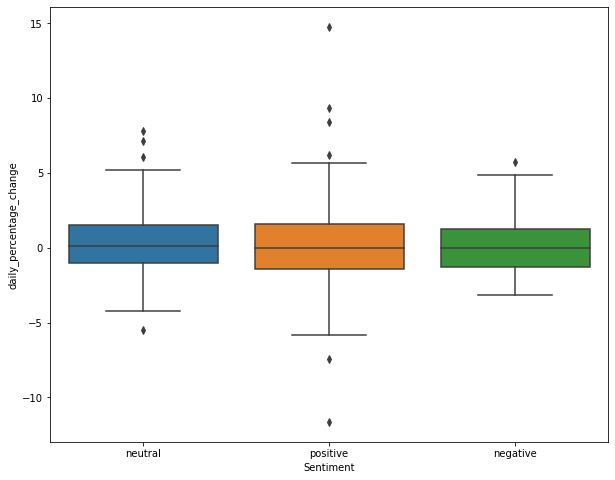

In [ ]:
plt.figure(figsize=(10, 10))
sns.violinplot(x=sentiment_stock_change_df.Sentiment, y=sentiment_stock_change_df.daily_percentage_change, data=sentiment_stock_change_df, height=8)


plt.figure(figsize=(10, 8))
sns.boxplot(data=sentiment_stock_change_df, x=sentiment_stock_change_df.Sentiment, y=sentiment_stock_change_df.daily_percentage_change)

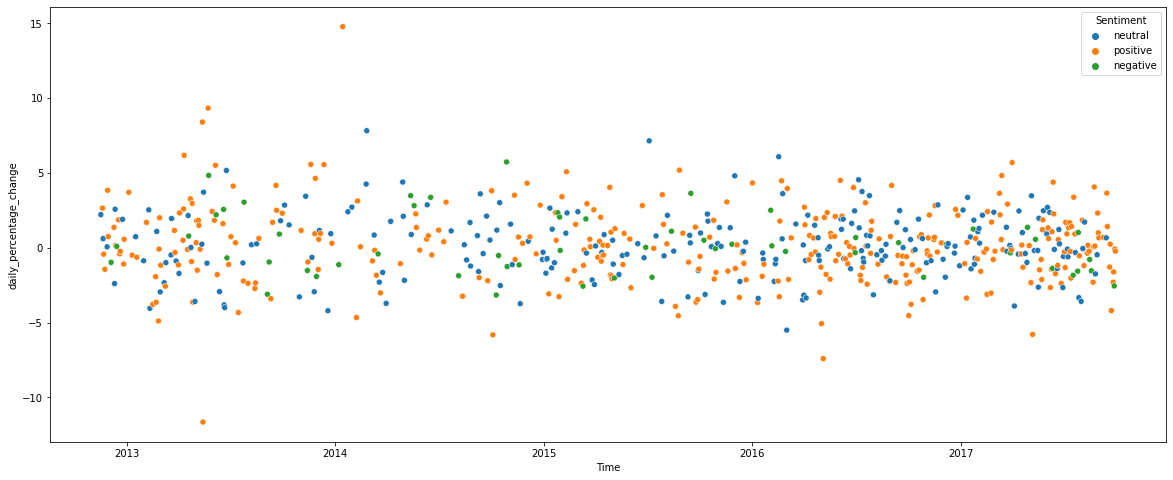

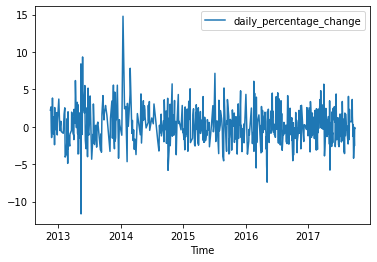

In [ ]:
# U sljedećoj vizualizaciji vidimo kako su koji tweetovi određenog sentimenta utjecali na postotak promjene cijene kroz period od nekoliko godina
plt.figure(figsize=(20, 8))
sns.scatterplot(x=sentiment_stock_change_df['Time'], y=sentiment_stock_change_df['daily_percentage_change'], 
                data=sentiment_stock_change_df,hue=sentiment_stock_change_df['Sentiment']);

sentiment_stock_change_df[['Time', 'daily_percentage_change']].set_index('Time').plot()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



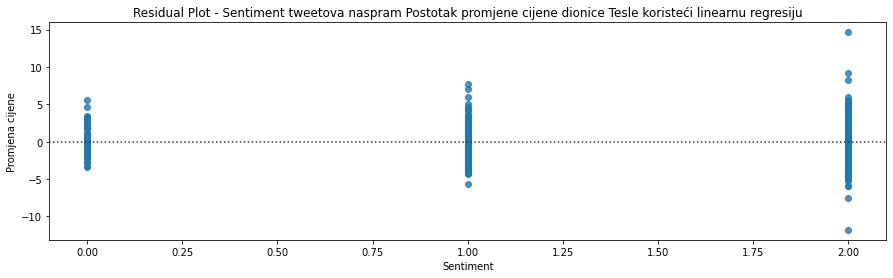

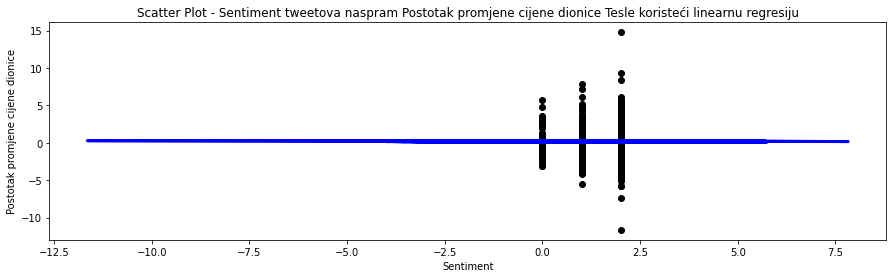

R2 (Variance) score using linear_regression model =  -0.0019983154631408873
R2 (Variance) score using sklearn metrics with linear_regression =  -0.011881665583770129


<ipython-input-101-dfc9ad6bdcee>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



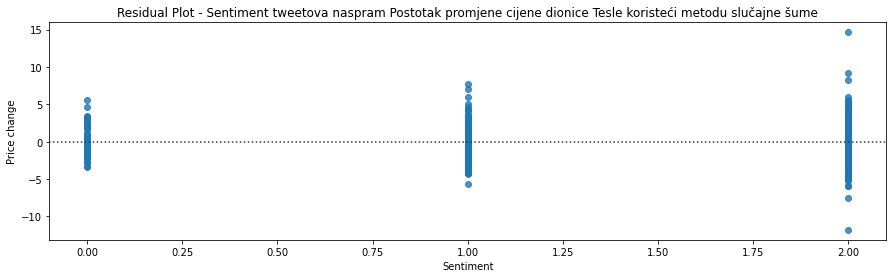

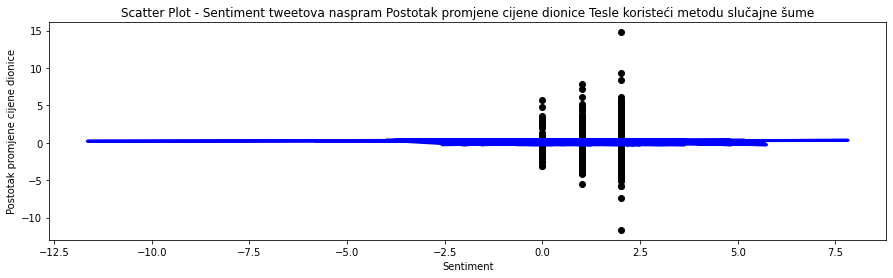

R2 (Variance) score using random forest model =  -0.006293540090849259
R2 (Variance) score using sklearn metrics with random forest =  -0.030529609676066993


In [ ]:
sentiment_stock_change_updated = make_sentiment_column_categorical(sentiment_stock_change_df)
sentiment = sentiment_stock_change_updated.Sentiment.values.reshape(-1, 1)
price_change = sentiment_stock_change_updated.daily_percentage_change.values.reshape(-1, 1)

r2_score_1, r2_score_2 = do_linear_regression(sentiment, price_change)
print('R2 (Variance) score using linear_regression model = ', r2_score_1)
print('R2 (Variance) score using sklearn metrics with linear_regression = ', r2_score_2)

r2_score_1, r2_score_2 = do_random_forest_analysis(sentiment, price_change)
print('R2 (Variance) score using random forest model = ', r2_score_1)
print('R2 (Variance) score using sklearn metrics with random forest = ', r2_score_2)

**Zaključak:** Prema podacima, model nije mogao predvidjeti nikakvu korelaciju između tweetova Elona Muska i promjena cijena dionica Tesle.

# **5. Optimizacija portfelja (Portfolio Optimization)**

U investiranju, optimizacija portfelja je zadatak odabira imovine tako da se povrat ulaganja maksimizira, a rizik minimalizira. Na primjer, investitor bi mogao biti zainteresiran za odabir pet dionica s popisa od 20 kako bi osigurao da zarade najviše novca.



In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Za učitavanje podataka sa stranice Yahoo! Finance
from  pandas_datareader.data import DataReader
import yfinance as yf

# Za dodavanje datuma
from datetime import datetime

# Za ovu analizu koristit ćemo se sljedećim dionicama
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NFLX']

# Namještamo datum do kojeg vadimo podatke
end = datetime.now()
#start = datetime(2000, 1, 1)
start = datetime(2018, 1, 1)


In [ ]:
# Radimo for petlju za dohvaćanje podataka i njihovo spremanje u dataframe
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
# AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
MRNA = yf.download("MRNA", start, end)
MRNA.head()

[*********************100%***********************]  1 of 1 completed


Open       High    Low      Close  Adj Close  \
Date                                                                           
2018-12-07 00:00:00-05:00  22.000000  22.750000  18.51  18.600000  18.600000   
2018-12-10 00:00:00-05:00  18.900000  19.438999  18.00  18.799999  18.799999   
2018-12-11 00:00:00-05:00  20.549999  20.660000  17.99  18.010000  18.010000   
2018-12-12 00:00:00-05:00  18.549999  19.480000  18.02  18.680000  18.680000   
2018-12-13 00:00:00-05:00  19.250000  19.290001  18.68  18.760000  18.760000   

                             Volume  
Date                                 
2018-12-07 00:00:00-05:00  12995600  
2018-12-10 00:00:00-05:00   4233300  
2018-12-11 00:00:00-05:00   3435300  
2018-12-12 00:00:00-05:00   2590700  
2018-12-13 00:00:00-05:00   1608600

In [ ]:
#Funkcija za lagano dohvaćanje podataka za dionicu koju želimo
def get_stock(ticker):
    data = yf.download(f"{ticker}",start,end)
    data[f'{ticker}'] = data["Adj Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

U sljedećim primjerima pokazat ćemo dohvaćanje podataka za nekoliko farmaceutskih kompacija: Moderna (MRNA), Pfizer (PFE), Johnson & Johnson (JNJ)

In [ ]:
moderna = get_stock("MRNA")

[*********************100%***********************]  1 of 1 completed
                                MRNA
Date                                
2018-12-07 00:00:00-05:00  18.600000
2018-12-10 00:00:00-05:00  18.799999
2018-12-11 00:00:00-05:00  18.010000
2018-12-12 00:00:00-05:00  18.680000
2018-12-13 00:00:00-05:00  18.760000


In [ ]:
moderna.head()

MRNA
Date                                
2018-12-07 00:00:00-05:00  18.600000
2018-12-10 00:00:00-05:00  18.799999
2018-12-11 00:00:00-05:00  18.010000
2018-12-12 00:00:00-05:00  18.680000
2018-12-13 00:00:00-05:00  18.760000

In [ ]:
pfizer = get_stock("PFE")
jnj = get_stock("JNJ")

[*********************100%***********************]  1 of 1 completed
                                 PFE
Date                                
2018-01-02 00:00:00-05:00  28.821974
2018-01-03 00:00:00-05:00  29.035522
2018-01-04 00:00:00-05:00  29.098804
2018-01-05 00:00:00-05:00  29.154165
2018-01-08 00:00:00-05:00  28.829880
[*********************100%***********************]  1 of 1 completed
                                  JNJ
Date                                 
2018-01-02 00:00:00-05:00  121.987549
2018-01-03 00:00:00-05:00  123.152855
2018-01-04 00:00:00-05:00  123.144096
2018-01-05 00:00:00-05:00  124.160439
2018-01-08 00:00:00-05:00  124.318153


In [ ]:
from functools import reduce

def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        data_frames.append(get_stock(i))
        
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    print(df_merged.head())
    return df_merged


In [ ]:
stocks = ["MRNA", "PFE", "JNJ"]
combine_stocks(stocks)

[*********************100%***********************]  1 of 1 completed
                                MRNA
Date                                
2018-12-07 00:00:00-05:00  18.600000
2018-12-10 00:00:00-05:00  18.799999
2018-12-11 00:00:00-05:00  18.010000
2018-12-12 00:00:00-05:00  18.680000
2018-12-13 00:00:00-05:00  18.760000
[*********************100%***********************]  1 of 1 completed
                                 PFE
Date                                
2018-01-02 00:00:00-05:00  28.821968
2018-01-03 00:00:00-05:00  29.035524
2018-01-04 00:00:00-05:00  29.098804
2018-01-05 00:00:00-05:00  29.154169
2018-01-08 00:00:00-05:00  28.829880
[*********************100%***********************]  1 of 1 completed
                                  JNJ
Date                                 
2018-01-02 00:00:00-05:00  121.987549
2018-01-03 00:00:00-05:00  123.152847
2018-01-04 00:00:00-05:00  123.144081
2018-01-05 00:00:00-05:00  124.160446
2018-01-08 00:00:00-05:00  124.318138
         

MRNA        PFE         JNJ
Date                                                        
2018-12-07 00:00:00-05:00   18.600000  35.979271  130.875793
2018-12-10 00:00:00-05:00   18.799999  36.372475  130.722824
2018-12-11 00:00:00-05:00   18.010000  36.052990  131.838730
2018-12-12 00:00:00-05:00   18.680000  36.175873  132.378693
2018-12-13 00:00:00-05:00   18.760000  36.511749  133.044632
2018-12-14 00:00:00-05:00   18.320000  35.880959  119.689781
2018-12-17 00:00:00-05:00   17.000000  35.315716  116.216064
2018-12-18 00:00:00-05:00   17.000000  34.734077  117.367973
2018-12-19 00:00:00-05:00   16.180000  34.381821  114.839188
2018-12-20 00:00:00-05:00   15.500000  34.365437  115.433144
2018-12-21 00:00:00-05:00   14.470000  34.349060  115.271164
2018-12-24 00:00:00-05:00   14.030000  33.218552  110.546555
2018-12-26 00:00:00-05:00   13.520000  34.562042  114.029259
2018-12-27 00:00:00-05:00   14.650000  35.102707  114.659203
2018-12-28 00:00:00-05:00   14.150000  35.192833  114.533211
2018-12-31 00:00:00-05:00   15.270000  35.758080  116.135094
2019-01-02 00:00:00-05:00   15.330000  35.430405  114.965172
2019-01-03 00:00:00-05:00   15.500000  34.439156  113.138344
2019-01-04 00:00:00-05:00   16.959999  35.225594  115.037186
2019-01-07 00:00:00-05:00   16.270000  35.414028  114.299240
2019-01-08 00:00:00-05:00   16.950001  35.577850  116.954010
2019-01-09 00:00:00-05:00   16.330000  35.504128  116.027084
2019-01-10 00:00:00-05:00   16.480000  34.660351  116.729050
2019-01-11 00:00:00-05:00   17.000000  35.127300  116.765022
2019-01-14 00:00:00-05:00   16.740000  34.709503  115.442139
2019-01-15 00:00:00-05:00   16.590000  35.004410  116.414040
2019-01-16 00:00:00-05:00   16.260000  34.496506  115.226151
2019-01-17 00:00:00-05:00   16.309999  34.791420  116.171074
2019-01-18 00:00:00-05:00   16.690001  34.840576  117.610947
2019-01-22 00:00:00-05:00   15.560000  34.627586  115.910095
2019-01-23 00:00:00-05:00   14.790000  34.537476  115.910095
2019-01-24 00:00:00-05:00   14.640000  33.546238  114.317230
2019-01-25 00:00:00-05:00   14.910000  33.292290  115.397141
2019-01-28 00:00:00-05:00   14.450000  32.382977  116.081078
2019-01-29 00:00:00-05:00   14.630000  33.398777  117.286980
2019-01-30 00:00:00-05:00   15.130000  34.062332  118.465874
2019-01-31 00:00:00-05:00   16.600000  35.078743  119.761749
2019-02-01 00:00:00-05:00   16.219999  35.434086  120.769684
2019-02-04 00:00:00-05:00   16.270000  35.070488  119.581787
2019-02-05 00:00:00-05:00   17.180000  34.797787  119.581787
2019-02-06 00:00:00-05:00   18.139999  34.979580  119.689781
2019-02-07 00:00:00-05:00   17.049999  34.458984  118.834854
2019-02-08 00:00:00-05:00   17.990000  34.896950  119.149811
2019-02-11 00:00:00-05:00   18.170000  34.442455  118.789856
2019-02-12 00:00:00-05:00   18.690001  34.599464  120.733673
2019-02-13 00:00:00-05:00   18.530001  34.458984  120.994644
2019-02-14 00:00:00-05:00   19.660000  34.682098  120.868675
2019-02-15 00:00:00-05:00   21.440001  35.037434  122.731514
2019-02-19 00:00:00-05:00   20.830000  35.202705  122.110580
2019-02-20 00:00:00-05:00   19.920000  34.872158  122.704536
2019-02-21 00:00:00-05:00   19.340000  34.822578  121.867577
2019-02-22 00:00:00-05:00   19.879999  35.500187  122.929489
2019-02-25 00:00:00-05:00   21.650000  35.599350  123.382477
2019-02-26 00:00:00-05:00   23.700001  35.549774  123.300941
2019-02-27 00:00:00-05:00   22.100000  35.475399  123.083511
2019-02-28 00:00:00-05:00   22.600000  35.822472  123.781021
2019-03-01 00:00:00-05:00   22.270000  35.830730  125.330109
2019-03-04 00:00:00-05:00   21.120001  35.591091  125.447876
2019-03-05 00:00:00-05:00   21.370001  35.442341  125.710571
2019-03-06 00:00:00-05:00   20.650000  34.591206  126.000458
2019-03-07 00:00:00-05:00   20.590000  34.202808  125.230469
2019-03-08 00:00:00-05:00   20.930000  33.789642  125.067390
2019-03-11 00:00:00-04:00   20.430000  34.293713  125.520348
2019-03-12 00:00:00-04:00   19.260000  34.483761  126.081993
2019-03

Na primjer, umjesto odabira portfelja dionica tehnoloških kompanija, trebali biste odabrati portfelj s dionicama različitih industrija. U praksi, algoritam za optimizaciju srednje varijance može odabrati portfelj koji sadrži imovinu u tehnologiji, maloprodaji, zdravstvu i nekretninama umjesto jedne industrije poput tehnologije. Povući ćemo tri dionice za svaku industriju.

### Dionice koje uzimamo:

1. Healthcare: Moderna (MRNA), Pfizer (PFE), Johnson & Johnson (JNJ)

2. Tech: Google (GOOGL), Facebook (META), Apple (AAPL)

3. Retail: Costco (COST), Walmart (WMT),  Kroger Co (KR)

4. Finance: JPMorgan Chase & Co (JPM), Bank of America (BAC), HSBC Holding (HSBC)

In [ ]:
stocks = ["MRNA", "PFE", "JNJ", "GOOGL", 
          "META", "AAPL", "COST", "WMT", "KR", "JPM", 
          "BAC", "HSBC"]
portfolio = combine_stocks(stocks)

[*********************100%***********************]  1 of 1 completed
                                MRNA
Date                                
2018-12-07 00:00:00-05:00  18.600000
2018-12-10 00:00:00-05:00  18.799999
2018-12-11 00:00:00-05:00  18.010000
2018-12-12 00:00:00-05:00  18.680000
2018-12-13 00:00:00-05:00  18.760000
[*********************100%***********************]  1 of 1 completed
                                 PFE
Date                                
2018-01-02 00:00:00-05:00  28.821968
2018-01-03 00:00:00-05:00  29.035532
2018-01-04 00:00:00-05:00  29.098799
2018-01-05 00:00:00-05:00  29.154167
2018-01-08 00:00:00-05:00  28.829882
[*********************100%***********************]  1 of 1 completed
                                  JNJ
Date                                 
2018-01-02 00:00:00-05:00  121.987549
2018-01-03 00:00:00-05:00  123.152847
2018-01-04 00:00:00-05:00  123.144081
2018-01-05 00:00:00-05:00  124.160446
2018-01-08 00:00:00-05:00  124.318138
[********

In [ ]:
portfolio.head()

MRNA        PFE         JNJ      GOOGL  \
Date                                                                     
2018-12-07 00:00:00-05:00  18.600000  35.979263  130.875793  52.328999   
2018-12-10 00:00:00-05:00  18.799999  36.372475  130.722824  52.659000   
2018-12-11 00:00:00-05:00  18.010000  36.052990  131.838730  53.082500   
2018-12-12 00:00:00-05:00  18.680000  36.175869  132.378693  53.686501   
2018-12-13 00:00:00-05:00  18.760000  36.511742  133.044632  53.676998   

                                 META       AAPL        COST        WMT  \
Date                                                                      
2018-12-07 00:00:00-05:00  137.419998  40.655613  212.113312  87.065460   
2018-12-10 00:00:00-05:00  141.850006  40.923454  210.038071  87.766159   
2018-12-11 00:00:00-05:00  142.080002  40.689400  213.660355  87.682076   
2018-12-12 00:00:00-05:00  144.500000  40.802811  214.886658  86.990723   
2018-12-13 00:00:00-05:00  145.009995  41.249195  213.669785  86.850578   

                                  KR        JPM        BAC       HSBC  
Date                                                                   
2018-12-07 00:00:00-05:00  26.818195  90.730026  23.216961  34.335098  
2018-12-10 00:00:00-05:00  26.468834  89.034714  22.605270  33.965271  
2018-12-11 00:00:00-05:00  26.882553  88.165085  22.440933  33.839191  
2018-12-12 00:00:00-05:00  27.351431  88.736046  22.386152  34.755356  
2018-12-13 00:00:00-05:00  27.360628  88.823875  22.276598  34.730141

Za lakšu analizu ovog dataseta možemo ga upisati u csv

In [ ]:
portfolio.to_csv("portfolio.csv", index=False)

In [ ]:
portfolio = pd.read_csv("portfolio.csv")

Sad kad smo napravili željeni dataset možemo započeti njegovu optimizaciju

Koristit ćemo se [***PyPortfolioOpt***](https://pypi.org/project/pyportfolioopt/#an-overview-of-classical-portfolio-optimization-methods) bibliotekom.



In [ ]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 93.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


## **5.1 Mean Variance Optimization**

Optimizacija srednje varijance ključni je element ulaganja temeljenog na podacima. To je proces mjerenja rizika imovine u odnosu na vjerojatni povrat i ulaganja na temelju tog omjera rizika i povrata.

Analiza srednje varijance je alat koji ulagači koriste za pomoć u raspodjeli rizika u svom portfelju. U njemu investitor mjeri rizik imovine, izražen kao "varijanca", zatim to uspoređuje s vjerojatnim povratom imovine. Cilj optimizacije srednje varijance je maksimizirati nagradu ulaganja na temelju rizika.

Ovo je dio općeg pristupa ulaganju poznatog kao optimizacija portfelja ili moderna teorija portfelja. Optimizirani portfelj trebao bi generirati najveći mogući povrat na temelju razine rizika koju je ulagač odabrao. Također bi trebao generirati najmanju količinu rizika za željeni povrat investitora.

Ulagači će koristiti optimizaciju srednje varijance za stvaranje skupova podataka rizika/nagrade za različitu imovinu. Zatim mogu ulagati na temelju tih informacija. Ova analiza može pomoći ulagačima da diversificiraju svoj portfelj kroz različite razine rizika i odaberu svoja ulaganja na temelju željenog povrata.

In [ ]:
# Računamo matricu kovarijance i pohranimo izračunate povrate u varijable S i mu, redom:

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

Zatim uvozimo modul EfficientFrontier i izračunajmo težine. Ovdje ćemo koristiti maksimalnu Sharpeovu statistiku. Sharpeov omjer je omjer između povrata i rizika. Što je manji rizik i veći prinosi, to je veći Sharpeov omjer. Algoritam traži maksimalni Sharpeov omjer, što znači portfelj s najvećim povratom i najmanjim rizikom. U konačnici, što je veći Sharpeov omjer, to je bolja izvedba portfelja.

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'MRNA': 1.0, 'PFE': 0.0, 'JNJ': 0.0, 'GOOGL': 0.0, 'META': 0.0, 'AAPL': 0.0, 'COST': 0.0, 'WMT': 0.0, 'KR': 0.0, 'JPM': 0.0, 'BAC': 0.0, 'HSBC': 0.0}


Prikazujemo performanse portfelja:

In [ ]:
ef.portfolio_performance(verbose=True)

Expected annual return: 59.2%
Annual volatility: 65.5%
Sharpe Ratio: 0.87


(0.5917919315446718, 0.6551509327582942, 0.8727636685753203)

Dobivene težine pretvorit ćemo u stvarne vrijednosti alokacije (tj. koliko svake dionice kupiti). Za našu raspodjelu, uzmimo u obzir iznos ulaganja od 100.000 USD:

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

In [ ]:
latest_prices.isna()

MRNA     False
PFE      False
JNJ      False
GOOGL    False
META     False
AAPL     False
COST     False
WMT      False
KR       False
JPM      False
BAC      False
HSBC     False
Name: 1271, dtype: bool

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
latest_prices = latest_prices.dropna()

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'MRNA': 515}
Funds remaining: $100.30


/usr/local/lib/python3.8/dist-packages/pypfopt/discrete_allocation.py:210: RuntimeWarning:

invalid value encountered in true_divide



Algoritam nam preporučuje da uzmemo 521 dionicu Moderne

Optimizacija srednje varijance ne funkcionira baš dobro jer donosi mnoge pojednostavljujuće pretpostavke, kao što su povrati koji su normalno raspodijeljeni i potreba za invertibilnom matricom kovarijance. Srećom, metode kao što su HRP i mCVAR rješavaju ta ograničenja.

## **5.2 Hierarchical Risk Parity (HRP)**

HRP metoda funkcionira tako da pronalazi podklastere slične imovine na temelju povrata i konstruira hijerarhiju iz tih klastera kako bi se generirale težine za svaku imovinu.

Počnimo s uvozom HRPOpt metode iz Pypfopt-a:

In [ ]:
from pypfopt import HRPOpt

Zatim moramo izračunati povrate:

In [ ]:
returns = portfolio.pct_change().dropna()

Zatim pokrenite algoritam optimizacije da dobijete težine:

In [ ]:
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()

Sada možemo ispisati izvedbu portfelja i težine:

In [ ]:
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: 9.3%
Annual volatility: 21.4%
Sharpe Ratio: 0.34
{'AAPL': 0.05632497840805714, 'BAC': 0.07287441244187949, 'COST': 0.03995510569822535, 'GOOGL': 0.03999949515597268, 'HSBC': 0.18947323027208912, 'JNJ': 0.1216590344571102, 'JPM': 0.09978928882979068, 'KR': 0.07164245609353993, 'META': 0.07765838359332322, 'MRNA': 0.038814630520292145, 'PFE': 0.07499597343022742, 'WMT': 0.1168130110994926}


Vidimo da imamo očekivani godišnji povrat od 9.3 posto, što je znatno manje od  58.9% posto koje smo postigli optimizacijom srednje varijance. Također vidimo smanjeni Sharpeov omjer od 0.34. Ovaj je rezultat mnogo razumniji i vjerojatnije je da će se održati u budućnosti budući da HRP nije toliko osjetljiv na izvanredne vrijednosti kao što je to optimizacija srednje varijance.

Konačno, izračunajmo diskretnu raspodjelu koristeći naše težine:

In [ ]:
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'HSBC': 549, 'JNJ': 93, 'WMT': 132, 'JPM': 108, 'META': 56, 'PFE': 203, 'BAC': 303, 'KR': 263, 'AAPL': 134, 'GOOGL': 74, 'COST': 18, 'MRNA': 20}
Funds remaining (HRP): $3.85


Model predlaže različito ulaganje , a ne kao prethodni model, toliko u Modernu (MRNA). Nadalje, iako se izvedba smanjila, možemo biti sigurniji da će ovaj model raditi jednako dobro kada osvježimo naše podatke. To je zato što je HRP otporniji na anomalan porast cijena dionica Moderne.

## **5.3 Mean Conditional Value at Risk (mCVAR)**

mCVAR je još jedna popularna alternativa optimizaciji varijance srednje vrijednosti. Djeluje tako da mjeri najgore scenarije za svaku imovinu u portfelju, koja je ovdje predstavljena gubitkom najviše novca. Gubitak u najgorem slučaju za svaku imovinu zatim se koristi za izračun težina koji će se koristiti za alokaciju za svaku imovinu.

Uvezimo metodu EEfficicientCVAR:

In [ ]:
from pypfopt.efficient_frontier import EfficientCVaR

Računamo težine i dobijemo učinak:

In [ ]:
S = portfolio.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

{'MRNA': 0.07915, 'PFE': 0.0, 'JNJ': 0.0, 'GOOGL': 0.0, 'META': 0.0, 'AAPL': 0.0, 'COST': 0.0, 'WMT': 0.0, 'KR': 0.0, 'JPM': 0.0, 'BAC': 0.0, 'HSBC': 0.92085}


Očekivani godišnji povrat:

In [ ]:
ef_cvar.portfolio_performance(verbose=True)

Expected annual return: 4.8%
Conditional Value at Risk: -2074.02%


(0.047552786519264305, -20.74024425910882)

Preporučene dionice za kupnju ako imamo 100 000 dolara:

In [ ]:
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'HSBC': 2671, 'MRNA': 40, 'JPM': 1, 'BAC': 1, 'GOOGL': 1}
Funds remaining (CVAR): $2.26


# **6. Zaključak Projekta**

U ovom projektu prikazali smo različite mogućnosti za analizu i vizualizaciju naizgled običnih tabličnih podataka. 

Uz primjenu stečenog znanja i vještina i ti obični tablični podaci mogu ukazati na različite fenomene te potvrditi ili opovrgnuti neke naše pretpostavke.

Primjenom adekvatne analize na ovim javno dostupnim podacima možemo dobiti informacije za poprilično praktičnu stvar kao što je ulaganje u dionice. Korištenjem jednostavnih i svakom dostupnim alatima i bibliotekama u Google Colabu vizualizirali smo si cijenu dionica u dužem vremenskom periodu kako bismo bolje uočili uzorak u rastu i padu cijena uzevši u obzir događanja u svijetu u tom periodu. 

Uočili smo neke pravilnosti u volumenu trgovanja kroz godinu te nas mali volumeni uoči zimskih praznika ne bi trebali iznenaditi.

Analizom sentimenta tweetova i utjecaja tih tweetova na cijenu dionice uočili smo da je utjecaj zanemariv u duljem vremenskom periodu i da se ne bi trebali strahovati od naglih promjena cijena zbog njih.

Metode optimizacije pokazale su se iznimno korisnima u pronalaženju upravo onih dionica u čije ulaganje donosi maksimalni profit i minimalni rizik za naš portfelj

Stečeno znanje i tehnologija pokazali su se iznimno korisnima u analizi ovoga područja.